In [1]:
import numpy as np # importing required libraries 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = r'https://www.flipkart.com/search?q=gummies+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page='

In [ ]:
urls = []
for i in range(1,51):
    
    page = requests.get(url+str(i))
    soup = BeautifulSoup(page.text)
    
    
    d = soup.find_all('div', class_='_4ddWXP')
    for j in d:

        aa = j.find('a')
        if aa.has_attr('href'):
            a = re.findall('\/[A-z]+\-.*',aa['href'])

            if len(a)==1:
                urls.append(a[0])

In [ ]:
links = []
for i in urls:
    links.append('https://www.flipkart.com'+i)

In [ ]:
info=[]
price =[]
rating =[]
actual_price =[]

for i in links:
    
    page1 = requests.get(i)
    soup = BeautifulSoup(page1.text)
    
    for p in soup.find_all('div', class_='_30jeq3 _16Jk6d'):
        price.append(p.text)
        
    container = soup.find_all('div',class_='aMaAEs')
    #print(container)
    for j in container:
        #print(j.text)
        ratings = j.find('div',class_='_3LWZlK')
        #print(ratings.text)
        if ratings:
            rating.append(ratings.text)
        else:
            rating.append(np.nan)
            
        act = j.find('div',class_='_3I9_wc _2p6lqe')
        if act:
            actual_price.append(act.text)
        else:
            actual_price.append(np.nan)
    
    for k in soup.find_all("div",class_="_3dtsli"):
        
        info.append([k.text])

In [ ]:
brand=[]
Type = []
quantity = []
diet_preferences =[]
Form= []
Maximum_Shelf_Life=[]
Serving_Size = []

######################
for i in info:
        
    b = re.findall('Brand(.*)Model\sName',str(i))
    if len(b)>0:
        brand.append(b[0])
    else:
        brand.append(np.nan)

    t = re.findall('Type(.*)Form',str(i))

    if len(t)>0:
        Type.append(t[0])
    else:
        Type.append(np.nan)


    q = re.findall('Net\sQuantity\d+',str(i))

    if len(q)>0:
        quantity.append(q[0])
    else:
        quantity.append(np.nan)


    diet = re.findall('Dietary\sPreference(.*)Composition',str(i))

    if len(diet)>0:
        diet_preferences.append(diet[0])
    else:
        diet_preferences.append(np.nan)


    form = re.findall('Form(.*)Dietary',str(i))
    if len(form)>0:
        Form.append(form[0])
    else:
        Form.append(np.nan)


    shelf_life = re.findall('(\d+\sMonths)',str(i))
    if len(shelf_life)>0:
        Maximum_Shelf_Life.append(shelf_life[0])
    else:
        Maximum_Shelf_Life.append(np.nan)


    servingsize = re.findall('Serving\sSize(\d+\sNo)\w+\s',str(i))
    if len(servingsize)>0:
        Serving_Size.append(servingsize[0])
    else:
        Serving_Size.append(np.nan)


# Before cleaning data

In [3]:
df = pd.read_csv(r"C:\Users\pc\Downloads\data.csv",index_col=0) # read the csv file ,by using index_col we can set the new index column which is already exisist in the Data Frame  
df

,Brand,type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life,Serving_Size,Price,actual_price,rating
0,Centrum,Multi Vitamin,Net Quantity30,NaN,NaN,18 Months,NaN,₹495,₹550,4.7
1,HEALTHKART,Vitamin C,Net Quantity60,Sugar Free,Gummies,18 Months,NaN,₹829,"₹1,199",4.0
2,Purna Gummies,Special Supplements,Net Quantity30,"Gluten Free, Wheat Free, No Cholesterol, No Tr...",Gummies,18 Months,1 No,₹99,₹499,4.1
3,Be Bodywise,Multi Vitamin,Net Quantity60,"Gluten Free, Sugar Free, No Artificial Color, ...",Gummies,2 Months,NaN,₹899,₹999,4.1
4,Purna Gummies,Fat Loss,Net Quantity30,"Wheat Free, No Cholesterol, No Trans Fat, Glut...",Gummies,18 Months,1 No,₹99,₹499,4.1
...,...,...,...,...,...,...,...,...,...,...
970,Healthy Streak,Dietary,Net Quantity30,NaN,NaN,NaN,NaN,₹449,₹999,NaN
971,What's Up Wellness,Multi Vitamin,Net Quantity30,NaN,NaN,NaN,NaN,₹679,₹899,4.9
972,Simply Nutrition,Multi Vitamin,Net Quantity60,NaN,Gummies,18 Months,1 No,₹500,₹999,3.0
973,Setu,Special Supplements,Net Quantity60,Non-GMO,Gummies,12 Months,1 No,₹849,"₹1,200",4.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 974
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               975 non-null    object 
 1   type                975 non-null    object 
 2   Quantity            975 non-null    object 
 3   Diet_preferences    336 non-null    object 
 4   Form                388 non-null    object 
 5   Maximum_Shelf_Life  448 non-null    object 
 6   Serving_Size        349 non-null    object 
 7   Price               975 non-null    object 
 8   actual_price        958 non-null    object 
 9   rating              542 non-null    float64
dtypes: float64(1), object(9)
memory usage: 83.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,542.0,4.298708,0.477534,2.8,4.0,4.3,4.7,5.0


In [6]:
new_column_names = {'type': 'Type', 'rating': 'Ratings','actual_price':'Actual_Price','Price':'Price_after_dis','Maximum_Shelf_Life':'Maximum_Shelf_Life(In_Months)'}
df.rename(columns=new_column_names, inplace=True) ## changing columns names 

In [7]:
df

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Serving_Size,Price_after_dis,Actual_Price,Ratings
0,Centrum,Multi Vitamin,Net Quantity30,NaN,NaN,18 Months,NaN,₹495,₹550,4.7
1,HEALTHKART,Vitamin C,Net Quantity60,Sugar Free,Gummies,18 Months,NaN,₹829,"₹1,199",4.0
2,Purna Gummies,Special Supplements,Net Quantity30,"Gluten Free, Wheat Free, No Cholesterol, No Tr...",Gummies,18 Months,1 No,₹99,₹499,4.1
3,Be Bodywise,Multi Vitamin,Net Quantity60,"Gluten Free, Sugar Free, No Artificial Color, ...",Gummies,2 Months,NaN,₹899,₹999,4.1
4,Purna Gummies,Fat Loss,Net Quantity30,"Wheat Free, No Cholesterol, No Trans Fat, Glut...",Gummies,18 Months,1 No,₹99,₹499,4.1
...,...,...,...,...,...,...,...,...,...,...
970,Healthy Streak,Dietary,Net Quantity30,NaN,NaN,NaN,NaN,₹449,₹999,NaN
971,What's Up Wellness,Multi Vitamin,Net Quantity30,NaN,NaN,NaN,NaN,₹679,₹899,4.9
972,Simply Nutrition,Multi Vitamin,Net Quantity60,NaN,Gummies,18 Months,1 No,₹500,₹999,3.0
973,Setu,Special Supplements,Net Quantity60,Non-GMO,Gummies,12 Months,1 No,₹849,"₹1,200",4.8


In [8]:
df2 = df.copy() # copying the data frame into other variable 
df3 = df.copy()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 974
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          975 non-null    object 
 1   Type                           975 non-null    object 
 2   Quantity                       975 non-null    object 
 3   Diet_preferences               336 non-null    object 
 4   Form                           388 non-null    object 
 5   Maximum_Shelf_Life(In_Months)  448 non-null    object 
 6   Serving_Size                   349 non-null    object 
 7   Price_after_dis                975 non-null    object 
 8   Actual_Price                   958 non-null    object 
 9   Ratings                        542 non-null    float64
dtypes: float64(1), object(9)
memory usage: 83.8+ KB


# Diet_preferences(column)

In [10]:
df2['Diet_preferences'].value_counts() 

Diet_preferences
Gluten Free                                                                                47
Sugar Free                                                                                 34
Non-GMO                                                                                    26
Dairy Free, No Soy, Gluten Free                                                            25
No Artificial Color, Non-GMO, Sugar Free, Gluten Free, No MSG                              25
                                                                                           ..
Dairy Free, Gluten Free, No Artificial Color, No Artificial Flavor, No MSG, No Soy          1
Gluten Free, Non-GMO, Dairy Free                                                            1
Gluten Free, No Artificial Flavor, Sugar Free, Non-GMO, No Cholesterol                      1
Sugar Free, No Artificial Flavor, No Artificial Color, Gluten Free, Non-GMO, Dairy Free     1
Gluten Free, No Soy, No Trans Fat          

In [11]:
df2['Diet_preferences'] = df2['Diet_preferences'].fillna('Not_Mentioned')
# replacing nan values by 'Not_Mentioned'

In [12]:
df2['Diet_preferences'].unique()

array(['Not_Mentioned', 'Sugar Free',
       'Gluten Free, Wheat Free, No Cholesterol, No Trans Fat, Yeast Free, Sodium Free, No Soy, No Dairy, No Sodium, Dairy Free, No Artificial Color, No Artificial Flavor, Non-GMO, No Starch',
       'Gluten Free, Sugar Free, No Artificial Color, No Corn, No Dairy, No Artificial Flavor, No Trans Fat, Non-GMO, No MSG, No Soy',
       'Wheat Free, No Cholesterol, No Trans Fat, Gluten Free, No Soy, No Dairy, Dairy Free, No Artificial Color, No Artificial Flavor, No Starch, Non-GMO',
       'Gluten Free, No Artificial Color, Non-GMO, No Trans Fat',
       'Gluten Free, Dairy Free, No Soy',
       'Dairy Free, No Soy, Gluten Free',
       'Non-GMO, Wheat Free, No Cholesterol, No Trans Fat, Sodium Free, Gluten Free, No Soy, No Dairy, Dairy Free, No Artificial Color, No Artificial Flavor, Non-GMO',
       'Gluten Free',
       'Gluten Free, Wheat Free, No Cholesterol, No Trans Fat, Sodium Free, No Soy, No Dairy, No Sodium, Dairy Free, No Artificial Color,

# Adding new columns to the dataframe

In [13]:
df2['Gluten_Free'] = df2['Diet_preferences'].str.contains('Gluten Free').astype(int) # dividing sub categories from 
df2['Sugar_Free'] = df2['Diet_preferences'].str.contains('Sugar Free').astype(int)
df2['Dairy_Free'] = df2['Diet_preferences'].str.contains('Dairy Free').astype(int)
df2['Non_GMO'] = df2['Diet_preferences'].str.contains('Non-GMO').astype(int)
df2['No_Soy'] = df2['Diet_preferences'].str.contains('No Soy').astype(int)
df2['No_Dairy'] = df2['Diet_preferences'].str.contains('No Dairy').astype(int)
df2['Wheat_Free'] = df2['Diet_preferences'].str.contains('Wheat Free').astype(int)
df2['No_Corn'] = df2['Diet_preferences'].str.contains('No Corn').astype(int)
df2['Yeast_Free'] = df2['Diet_preferences'].str.contains('Yeast Free').astype(int)

df2['No_Artificial_Color'] = df2['Diet_preferences'].str.contains('No Artificial Color').astype(int)
df2['No_Artificial_Flavor'] = df2['Diet_preferences'].str.contains('No Artificial Flavor').astype(int)
df2['No_MSG'] = df2['Diet_preferences'].str.contains('No MSG').astype(int)
df2['No_Trans_Fat'] = df2['Diet_preferences'].str.contains('No Trans Fat').astype(int)
df2['No_Starch'] = df2['Diet_preferences'].str.contains('No Starch').astype(int)

df2['No_Cholesterol'] = df2['Diet_preferences'].str.contains('No Cholesterol').astype(int)
df2['Low_Cholesterol'] = df2['Diet_preferences'].str.contains('Low Cholesterol').astype(int)
df2['Sodium_Free'] = df2['Diet_preferences'].str.contains('Sodium Free').astype(int)
df2['No_Sodium'] = df2['Diet_preferences'].str.contains('No Sodium').astype(int)
df2['Low_Sodium'] = df2['Diet_preferences'].str.contains('Low Sodium').astype(int)

In [14]:
df2

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Serving_Size,Price_after_dis,Actual_Price,Ratings,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
0,Centrum,Multi Vitamin,Net Quantity30,Not_Mentioned,NaN,18 Months,NaN,₹495,₹550,4.7,...,0,0,0,0,0,0,0,0,0,0
1,HEALTHKART,Vitamin C,Net Quantity60,Sugar Free,Gummies,18 Months,NaN,₹829,"₹1,199",4.0,...,0,0,0,0,0,0,0,0,0,0
2,Purna Gummies,Special Supplements,Net Quantity30,"Gluten Free, Wheat Free, No Cholesterol, No Tr...",Gummies,18 Months,1 No,₹99,₹499,4.1,...,1,1,0,1,1,1,0,1,1,0
3,Be Bodywise,Multi Vitamin,Net Quantity60,"Gluten Free, Sugar Free, No Artificial Color, ...",Gummies,2 Months,NaN,₹899,₹999,4.1,...,1,1,1,1,0,0,0,0,0,0
4,Purna Gummies,Fat Loss,Net Quantity30,"Wheat Free, No Cholesterol, No Trans Fat, Glut...",Gummies,18 Months,1 No,₹99,₹499,4.1,...,1,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Healthy Streak,Dietary,Net Quantity30,Not_Mentioned,NaN,NaN,NaN,₹449,₹999,NaN,...,0,0,0,0,0,0,0,0,0,0
971,What's Up Wellness,Multi Vitamin,Net Quantity30,Not_Mentioned,NaN,NaN,NaN,₹679,₹899,4.9,...,0,0,0,0,0,0,0,0,0,0
972,Simply Nutrition,Multi Vitamin,Net Quantity60,Not_Mentioned,Gummies,18 Months,1 No,₹500,₹999,3.0,...,0,0,0,0,0,0,0,0,0,0
973,Setu,Special Supplements,Net Quantity60,Non-GMO,Gummies,12 Months,1 No,₹849,"₹1,200",4.8,...,0,0,0,0,0,0,0,0,0,0


# Brand(column)

In [15]:
df['Brand'].unique()

array(['Centrum', 'HEALTHKART', 'Purna Gummies', 'Be Bodywise',
       'Man Matters', 'TATA 1mg', 'Nirvasa', 'healthsetgo', 'Swisse',
       'Bione', 'Rikhi', 'Nudge', 'Neuherbs', "What's Up Wellness",
       'Zingavita', 'Little Joys', 'DNUTRIXN', 'SUNVITA', 'Inlife',
       'power gummies', 'CF', 'THE BODY RESERVE', 'G GLOWSIK',
       'Bold Care', 'Simply Nutrition', 'La Natures', 'Ace Nutrimony',
       'Simply Herbal', 'Nutrazee', 'saturn by ghc', 'Lakshmi Krishna',
       'Nyumi', 'Nutrina Health lab Golu', 'YourHappyLife', 'Panchamrit',
       'INYU', 'OUTSUP', 'Nutriburst', 'Pure Nutrition', 'Nature Sure',
       'HaeltheraNutra', 'SwisseMe', 'wommune', 'Koshaveda', 'Miduty',
       'Kapiva', 'Better Nutrition', 'mars by GHC', 'Desi Nutri',
       'Jioo Organics', 'Nutronova', 'Naturewell Organics',
       'Royale Health Gummies', 'Smarty Pants', 'QUARANT', 'York IN',
       'Health Ok', 'Nature Made', "L'il Critters", 'OLLY',
       "Nature's Bounty", 'grinbizz', 'Pura Vida', 

In [16]:
# There is no null values in the brand column

In [17]:
df['Brand'].nunique()

107

In [18]:
df2

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Serving_Size,Price_after_dis,Actual_Price,Ratings,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
0,Centrum,Multi Vitamin,Net Quantity30,Not_Mentioned,NaN,18 Months,NaN,₹495,₹550,4.7,...,0,0,0,0,0,0,0,0,0,0
1,HEALTHKART,Vitamin C,Net Quantity60,Sugar Free,Gummies,18 Months,NaN,₹829,"₹1,199",4.0,...,0,0,0,0,0,0,0,0,0,0
2,Purna Gummies,Special Supplements,Net Quantity30,"Gluten Free, Wheat Free, No Cholesterol, No Tr...",Gummies,18 Months,1 No,₹99,₹499,4.1,...,1,1,0,1,1,1,0,1,1,0
3,Be Bodywise,Multi Vitamin,Net Quantity60,"Gluten Free, Sugar Free, No Artificial Color, ...",Gummies,2 Months,NaN,₹899,₹999,4.1,...,1,1,1,1,0,0,0,0,0,0
4,Purna Gummies,Fat Loss,Net Quantity30,"Wheat Free, No Cholesterol, No Trans Fat, Glut...",Gummies,18 Months,1 No,₹99,₹499,4.1,...,1,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Healthy Streak,Dietary,Net Quantity30,Not_Mentioned,NaN,NaN,NaN,₹449,₹999,NaN,...,0,0,0,0,0,0,0,0,0,0
971,What's Up Wellness,Multi Vitamin,Net Quantity30,Not_Mentioned,NaN,NaN,NaN,₹679,₹899,4.9,...,0,0,0,0,0,0,0,0,0,0
972,Simply Nutrition,Multi Vitamin,Net Quantity60,Not_Mentioned,Gummies,18 Months,1 No,₹500,₹999,3.0,...,0,0,0,0,0,0,0,0,0,0
973,Setu,Special Supplements,Net Quantity60,Non-GMO,Gummies,12 Months,1 No,₹849,"₹1,200",4.8,...,0,0,0,0,0,0,0,0,0,0


# cleaning the dataframe by columnwise

# Type

In [19]:
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Special SupplementsUsage TimingsPre-workout',
       'Multi VitaminUsage TimingsPost-workout',
       'Special SupplementsUsage TimingsPost-workout',
       'Vitamin HUsage TimingsPre-workout',
       'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies ',
       'Vitamin B', 'Multi VitaminUsage TimingsPre-workout',
       'Vitamin B12',
       'Multi VitaminUsage TimingsPost-workout, Pre-workout',
       'Special SupplementsFormGummiesDietary 

In [20]:
df2['Type'].nunique()

32

In [21]:
df2 = df2[df2['Type'] != 'Energy Bar']


In [22]:
df2['Type'] = df2['Type'].replace('Special SupplementsFormGummiesDietary PreferenceGluten Free, No Artificial Color, No Artificial Flavor, No Corn, No Soy, No Starch, No Trans Fat, Wheat Free, Yeast FreeCompositionvitamin C, OMEGA 3 DHA, Vitamin E, Astoxanthin, Zeaxanthin, luteinAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBottleFood PreferenceVeganServing Size1 LNet Quantity60 NoAdditional Featuresother_featuresAdvanced Blue Light Defense: The Potent Combination Of Lutein, Zeaxanthin, And Astaxanthin In Our Gummies Are Well-Known For Their Protective Properties Against Harmful Blue Light From Screens. This Trio Of Nutrients Not Only Filters The Blue Light But Also Helps In Relieving Eye Strain Caused By Extended Digital Screen Exposure., Supports Healthy Vision: The Unique Blend Of Vitamins And Antioxidants In Vision Boost Gummies Supports The Health Of Your Cornea, Retina, And Macula. It Helps In Maintaining Visual Function And Eye Health, Essential For Those Who Spend Long Hours On Digital Screens., Nature-Inspired Formulation: Our Gummies Are Not Only Loaded With Beneficial Ingredients But Are Also ', 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Special SupplementsUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workout'
 'Special SupplementsUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Multi VitaminUsage TimingsPre-workout' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-wo

In [23]:
df2['Type'] = df2['Type'].replace('Special SupplementsFormGummiesDietary PreferenceGluten Free, Low Cholesterol, Low Cholesterol, Low Sodium, No Artificial Flavor, Sugar Free, No Starch, No Trans FatAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianNet Quantity30 NoAdditional Featuresother_features• Natural and Plant Based ', 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Special SupplementsUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workout'
 'Special SupplementsUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Multi VitaminUsage TimingsPre-workout' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-wo

In [24]:
df2['Type'] = df2['Type'].replace('Special SupplementsUsage TimingsPre-workout', 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Multi VitaminUsage TimingsPost-workout'
 'Special SupplementsUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Multi VitaminUsage TimingsPre-workout' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-workout' 'Vitamin CUsage TimingsPre-workout'
 'Vi

In [25]:
df2['Type'] = df2['Type'].replace('Special SupplementsUsage TimingsPost-workout', 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Multi VitaminUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Multi VitaminUsage TimingsPre-workout' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-workout' 'Vitamin CUsage TimingsPre-workout'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGum

In [26]:
df2['Type'] = df2['Type'].replace('Special SupplementsUsage TimingsPost-workout', 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Multi VitaminUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Multi VitaminUsage TimingsPre-workout' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-workout' 'Vitamin CUsage TimingsPre-workout'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGum

In [27]:
df2['Type'] = df2['Type'].replace('Multi VitaminUsage TimingsPre-workout', 'Multi Vitamin')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Multi VitaminUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-workout' 'Vitamin CUsage TimingsPre-workout'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty A

In [28]:
df2['Type'] = df2['Type'].replace("Vitamin CUsage TimingsPre-workout", 'Vitamin C')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Multi VitaminUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Fat LossUsage TimingsPre-workout' 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'Multi Vi

In [29]:
df2['Type'] = df2['Type'].replace('Fat LossUsage TimingsPre-workout', 'Fat Loss')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Multi VitaminUsage TimingsPost-workout'
 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'Multi VitaminUsage TimingsPost-workout, Pre

In [30]:
df2['Type'] = df2['Type'].replace('Multi VitaminUsage TimingsPost-workout', 'Multi Vitamin')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout, NA'
 'DietaryUsage TimingsPre-wo

In [31]:
df2['Type'] = df2['Type'].replace('Fat LossUsage TimingsPost-workout', 'Fat Loss')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin HUsage TimingsPre-workout'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout, NA'
 'DietaryUsage TimingsPre-wo

In [32]:
df2['Type'] = df2['Type'].replace('Vitamin HUsage TimingsPre-workout', 'Vitamin H')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin H'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Special SupplementsUsage TimingsPost-workout, Pre-workout' 'Ayurvedic'
 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout, NA'
 'DietaryUsage TimingsPre-workout' 'Dietary Suppleme

In [33]:
df2['Type'] = df2['Type'].replace("Special SupplementsUsage TimingsPost-workout, Pre-workout", 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin H'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Ayurvedic' 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout, NA'
 'DietaryUsage TimingsPre-workout' 'Dietary Supplements' 'Vitamin D'
 'Fat LossUsage TimingsPost-workout, Pre-wor

In [34]:
df2['Type'] = df2['Type'].replace("Multi VitaminUsage TimingsPost-workout, Pre-workout, NA", 'Special Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin H'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12'
 'Multi VitaminUsage TimingsPost-workout, Pre-workout' 'Vitamin D3'
 'Ayurvedic' 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'DietaryUsage TimingsPre-workout' 'Dietary Supplements' 'Vitamin D'
 'Fat LossUsage TimingsPost-workout, Pre-workout']


In [35]:
df2['Type'] = df2['Type'].replace("Multi VitaminUsage TimingsPost-workout, Pre-workout", 'Multi Vitamin')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin H'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12' 'Vitamin D3' 'Ayurvedic' 'Vitamin B6' 'Dietary'
 "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'DietaryUsage TimingsPre-workout' 'Dietary Supplements' 'Vitamin D'
 'Fat LossUsage TimingsPost-workout, Pre-workout']


In [36]:
df2['Type'] = df2['Type'].replace("Dietary", 'Dietary Supplements')

# Verify the changes
print(df2['Type'].unique())

['Multi Vitamin' 'Vitamin C' 'Special Supplements' 'Fat Loss'
 'Anti-Oxidants' 'Vitamin H'
 'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies '
 'Vitamin B' 'Vitamin B12' 'Vitamin D3' 'Ayurvedic' 'Vitamin B6'
 'Dietary Supplements' "Special SupplementsFormGummiesCompositionWomen's "
 'Omega Fatty Acids/Fish Oil' 'Vitamin E'
 'DietaryUsage TimingsPre-workout' 'Vitamin D'
 'Fat LossUsage TimingsPost-workout, Pre-workout']


In [37]:
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H',
       'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies ',
       'Vitamin B', 'Vitamin B12', 'Vitamin D3', 'Ayurvedic',
       'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids/Fish Oil', 'Vitamin E',
       'DietaryUsage TimingsPre-workout', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [38]:
df2['Type'] = df2['Type'].replace("Special SupplementsFormGummiesCompositionWomen's", 'Special Supplements')
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H',
       'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies ',
       'Vitamin B', 'Vitamin B12', 'Vitamin D3', 'Ayurvedic',
       'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids/Fish Oil', 'Vitamin E',
       'DietaryUsage TimingsPre-workout', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [39]:
df2['Type'] = df2['Type'].replace("DietaryUsage TimingsPre-workout", 'Dietary Supplements')
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H',
       'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies ',
       'Vitamin B', 'Vitamin B12', 'Vitamin D3', 'Ayurvedic',
       'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids/Fish Oil', 'Vitamin E', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [40]:

df2['Type'] = df2['Type'].replace("Fat LossUsage TimingsPost-workout", 'Fat LossUsage')
df2['Type'].unique()
# these are not replacing the names

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H',
       'Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies ',
       'Vitamin B', 'Vitamin B12', 'Vitamin D3', 'Ayurvedic',
       'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids/Fish Oil', 'Vitamin E', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [41]:
df2['Type'] = df2['Type'].replace("Multi VitaminUsage TimingsPost-workoutFormGummiesDietary PreferenceGluten Free, No Artificial Flavor, No Artificial Flavor, No Trans Fat, No Soy, No Trans FatCompositionHyaluronic Acid, Vitamin C, Curcumin, Vitamin ENumber of Scoops per Container60 tabletsAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBoxFood PreferenceVegetarianServing Size4 gCountry of OriginIndiaNet Quantity60 NoDaily Value FeaturesVitamin8 %Other Daily Value FeaturesSuitable For: Vegetarian, Multi Vitamin Supplements, Gummies ", 'Multi Vitamin')
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H', 'Vitamin B', 'Vitamin B12',
       'Vitamin D3', 'Ayurvedic', 'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids/Fish Oil', 'Vitamin E', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [42]:
df2['Type'] = df2['Type'].str.replace("Special SupplementsFormGummiesCompositionWomen\s", 'Special Supplements')
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H', 'Vitamin B', 'Vitamin B12',
       'Vitamin D3', 'Ayurvedic', 'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids/Fish Oil', 'Vitamin E', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [43]:
df2['Type'] = df2['Type'].replace("Omega Fatty Acids/Fish Oil", 'Omega Fatty Acids')
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H', 'Vitamin B', 'Vitamin B12',
       'Vitamin D3', 'Ayurvedic', 'Vitamin B6', 'Dietary Supplements',
       "Special SupplementsFormGummiesCompositionWomen's ",
       'Omega Fatty Acids', 'Vitamin E', 'Vitamin D',
       'Fat LossUsage TimingsPost-workout, Pre-workout'], dtype=object)

In [44]:
df2['Type']=df2['Type'].str.replace("Special SupplementsFormGummiesCompositionWomen's", 'Special Supplements')

In [45]:
df2['Type']=df2['Type'].str.replace("Fat LossUsage TimingsPost-workout, Pre-workout", 'Fat Loss')

In [46]:
df2['Type']=df2['Type'].str.replace("Special Supplements ", 'Special Supplements')

In [47]:
df2['Type'].unique()

array(['Multi Vitamin', 'Vitamin C', 'Special Supplements', 'Fat Loss',
       'Anti-Oxidants', 'Vitamin H', 'Vitamin B', 'Vitamin B12',
       'Vitamin D3', 'Ayurvedic', 'Vitamin B6', 'Dietary Supplements',
       'Omega Fatty Acids', 'Vitamin E', 'Vitamin D'], dtype=object)

# Quantity(column)

In [48]:
# Convert "Quantity" column to string type
df2['Quantity'] = df2['Quantity'].astype(str)

# Extract only the numbers from the "Quantity" column
df2['Quantity'] = df2['Quantity'].str.extract('(\d+)').astype(int)

In [49]:
df2

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Serving_Size,Price_after_dis,Actual_Price,Ratings,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
0,Centrum,Multi Vitamin,30,Not_Mentioned,NaN,18 Months,NaN,₹495,₹550,4.7,...,0,0,0,0,0,0,0,0,0,0
1,HEALTHKART,Vitamin C,60,Sugar Free,Gummies,18 Months,NaN,₹829,"₹1,199",4.0,...,0,0,0,0,0,0,0,0,0,0
2,Purna Gummies,Special Supplements,30,"Gluten Free, Wheat Free, No Cholesterol, No Tr...",Gummies,18 Months,1 No,₹99,₹499,4.1,...,1,1,0,1,1,1,0,1,1,0
3,Be Bodywise,Multi Vitamin,60,"Gluten Free, Sugar Free, No Artificial Color, ...",Gummies,2 Months,NaN,₹899,₹999,4.1,...,1,1,1,1,0,0,0,0,0,0
4,Purna Gummies,Fat Loss,30,"Wheat Free, No Cholesterol, No Trans Fat, Glut...",Gummies,18 Months,1 No,₹99,₹499,4.1,...,1,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Healthy Streak,Dietary Supplements,30,Not_Mentioned,NaN,NaN,NaN,₹449,₹999,NaN,...,0,0,0,0,0,0,0,0,0,0
971,What's Up Wellness,Multi Vitamin,30,Not_Mentioned,NaN,NaN,NaN,₹679,₹899,4.9,...,0,0,0,0,0,0,0,0,0,0
972,Simply Nutrition,Multi Vitamin,60,Not_Mentioned,Gummies,18 Months,1 No,₹500,₹999,3.0,...,0,0,0,0,0,0,0,0,0,0
973,Setu,Special Supplements,60,Non-GMO,Gummies,12 Months,1 No,₹849,"₹1,200",4.8,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df2['Quantity'].unique()

array([ 30,  60,  15,  90,   2, 180, 120, 150,   3, 100,  45,  10,  80,
         5,  50, 190,  20, 400,   0,  70,   4, 500,   1, 900, 200])

# Form(column)

In [51]:
df2['Form'] = df2['Form'].fillna('Gummies')

In [52]:
df2['Form'].unique()

array(['Gummies',
       'GummiesDietary PreferenceGluten Free, Dairy FreeCompositionEnergy 12kcal Total Carbohydrate 3.2g Sugar 2.4g ',
       'GummiesDietary PreferenceGluten FreeCompositionEnergy 7.5kcal Total Carbohydrate 2g Sugar - 1.5g ',
       'GummiesDietary PreferenceGluten Free, Dairy FreeCompositionEnergy 7.5kcal Total Carbohydrate 2g Sugar - 1.5g ',
       'GummiesDietary PreferenceGluten Free, No Artificial Color, No Artificial Flavor, No Corn, No Soy, No Starch, No Trans Fat, Wheat Free, Yeast FreeCompositionvitamin C, OMEGA 3 DHA, Vitamin E, Astoxanthin, Zeaxanthin, luteinAyurvedicNoMaximum Shelf Life18 MonthsContainer TypeBottleFood PreferenceVeganServing Size1 LNet Quantity60 NoAdditional Featuresother_featuresAdvanced Blue Light Defense: The Potent Combination Of Lutein, Zeaxanthin, And Astaxanthin In Our Gummies Are Well-Known For Their Protective Properties Against Harmful Blue Light From Screens. This Trio Of Nutrients Not Only Filters The Blue Light But Also Help

# Price_after_discount

In [53]:
df2['Price_after_dis'] = df2['Price_after_dis'].replace({',': '', '₹': ''}, regex=True).astype(float)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 974
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          974 non-null    object 
 1   Type                           974 non-null    object 
 2   Quantity                       974 non-null    int32  
 3   Diet_preferences               974 non-null    object 
 4   Form                           974 non-null    object 
 5   Maximum_Shelf_Life(In_Months)  447 non-null    object 
 6   Serving_Size                   348 non-null    object 
 7   Price_after_dis                974 non-null    float64
 8   Actual_Price                   957 non-null    object 
 9   Ratings                        542 non-null    float64
 10  Gluten_Free                    974 non-null    int32  
 11  Sugar_Free                     974 non-null    int32  
 12  Dairy_Free                     974 non-null    int32  


# Actual_Price(column)

In [55]:
df2['Actual_Price'] = df2['Actual_Price'].str.replace(',', '').str.replace('₹', '')

In [56]:
df2['Actual_Price'] = df2['Actual_Price'].astype('float')

In [57]:
df2.dropna(subset=['Actual_Price'], inplace=True)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 974
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          957 non-null    object 
 1   Type                           957 non-null    object 
 2   Quantity                       957 non-null    int32  
 3   Diet_preferences               957 non-null    object 
 4   Form                           957 non-null    object 
 5   Maximum_Shelf_Life(In_Months)  435 non-null    object 
 6   Serving_Size                   338 non-null    object 
 7   Price_after_dis                957 non-null    float64
 8   Actual_Price                   957 non-null    float64
 9   Ratings                        531 non-null    float64
 10  Gluten_Free                    957 non-null    int32  
 11  Sugar_Free                     957 non-null    int32  
 12  Dairy_Free                     957 non-null    int32  


In [59]:
df2['Maximum_Shelf_Life(In_Months)'].isna().sum()

522

In [60]:
x=df2[df2['Maximum_Shelf_Life(In_Months)'].isna()]

In [61]:
df2['Maximum_Shelf_Life(In_Months)']=df2['Maximum_Shelf_Life(In_Months)'].str.replace('Months','')

In [62]:
df2['Maximum_Shelf_Life(In_Months)']=df2['Maximum_Shelf_Life(In_Months)'].astype('float')

In [63]:
df2['Maximum_Shelf_Life(In_Months)']=df2['Maximum_Shelf_Life(In_Months)'].bfill().ffill()

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 974
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          957 non-null    object 
 1   Type                           957 non-null    object 
 2   Quantity                       957 non-null    int32  
 3   Diet_preferences               957 non-null    object 
 4   Form                           957 non-null    object 
 5   Maximum_Shelf_Life(In_Months)  957 non-null    float64
 6   Serving_Size                   338 non-null    object 
 7   Price_after_dis                957 non-null    float64
 8   Actual_Price                   957 non-null    float64
 9   Ratings                        531 non-null    float64
 10  Gluten_Free                    957 non-null    int32  
 11  Sugar_Free                     957 non-null    int32  
 12  Dairy_Free                     957 non-null    int32  


In [65]:
df2['Ratings'] = df2['Ratings'].fillna('0')

In [66]:
df2=df2.drop(columns='Serving_Size')

In [67]:
df2['Ratings']=df2['Ratings'].astype('float')

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 974
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          957 non-null    object 
 1   Type                           957 non-null    object 
 2   Quantity                       957 non-null    int32  
 3   Diet_preferences               957 non-null    object 
 4   Form                           957 non-null    object 
 5   Maximum_Shelf_Life(In_Months)  957 non-null    float64
 6   Price_after_dis                957 non-null    float64
 7   Actual_Price                   957 non-null    float64
 8   Ratings                        957 non-null    float64
 9   Gluten_Free                    957 non-null    int32  
 10  Sugar_Free                     957 non-null    int32  
 11  Dairy_Free                     957 non-null    int32  
 12  Non_GMO                        957 non-null    int32  


# Cleaned data

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 974
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand                          957 non-null    object 
 1   Type                           957 non-null    object 
 2   Quantity                       957 non-null    int32  
 3   Diet_preferences               957 non-null    object 
 4   Form                           957 non-null    object 
 5   Maximum_Shelf_Life(In_Months)  957 non-null    float64
 6   Price_after_dis                957 non-null    float64
 7   Actual_Price                   957 non-null    float64
 8   Ratings                        957 non-null    float64
 9   Gluten_Free                    957 non-null    int32  
 10  Sugar_Free                     957 non-null    int32  
 11  Dairy_Free                     957 non-null    int32  
 12  Non_GMO                        957 non-null    int32  


# Ananlysis On Data 

## Uni-Variant Analysis 

# Brand 

In [70]:
for_single='#FF9F00'

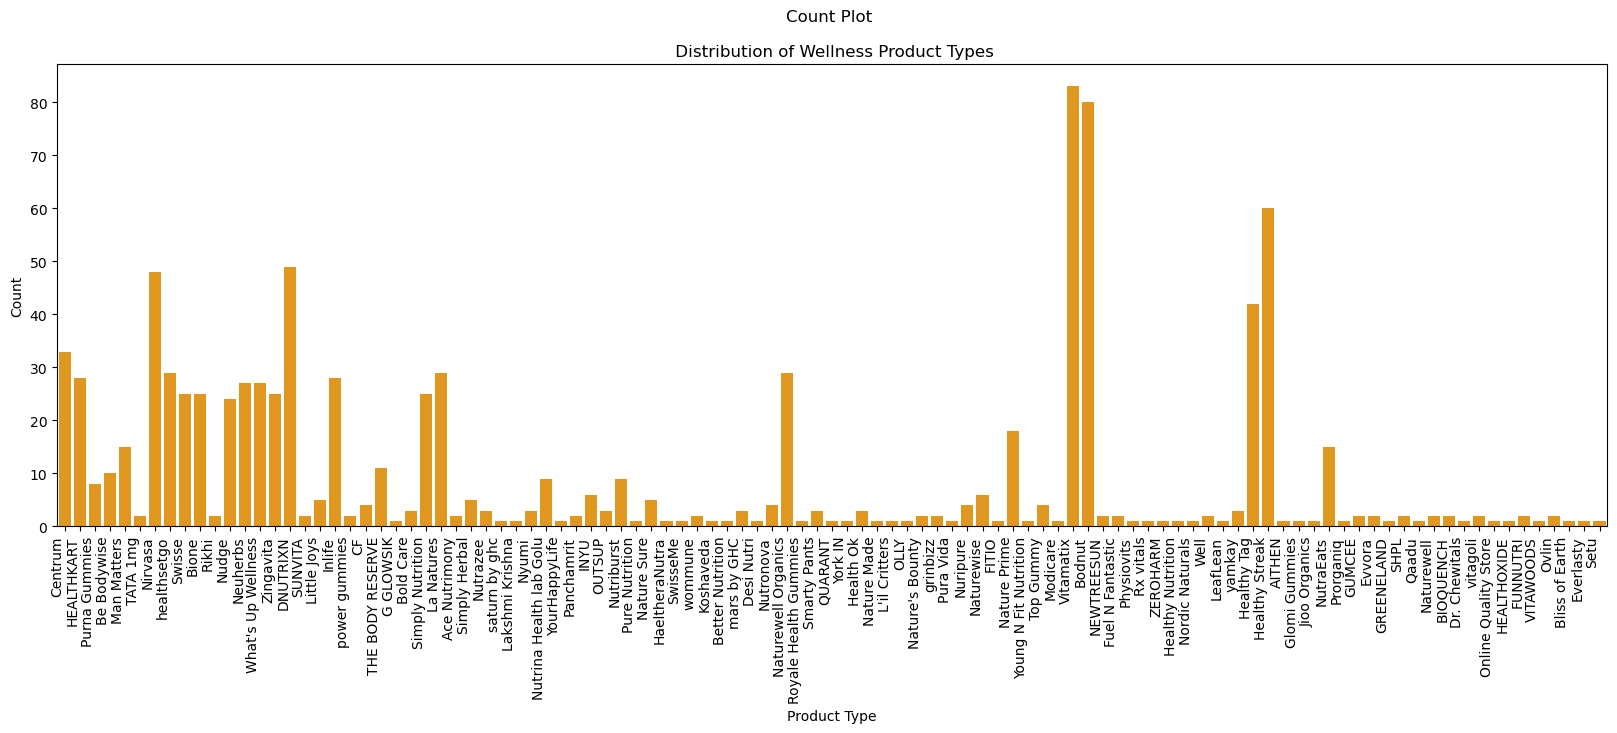

In [71]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Brand', data=df2,color=for_single)
plt.title('Count Plot \n\n Distribution of Wellness Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

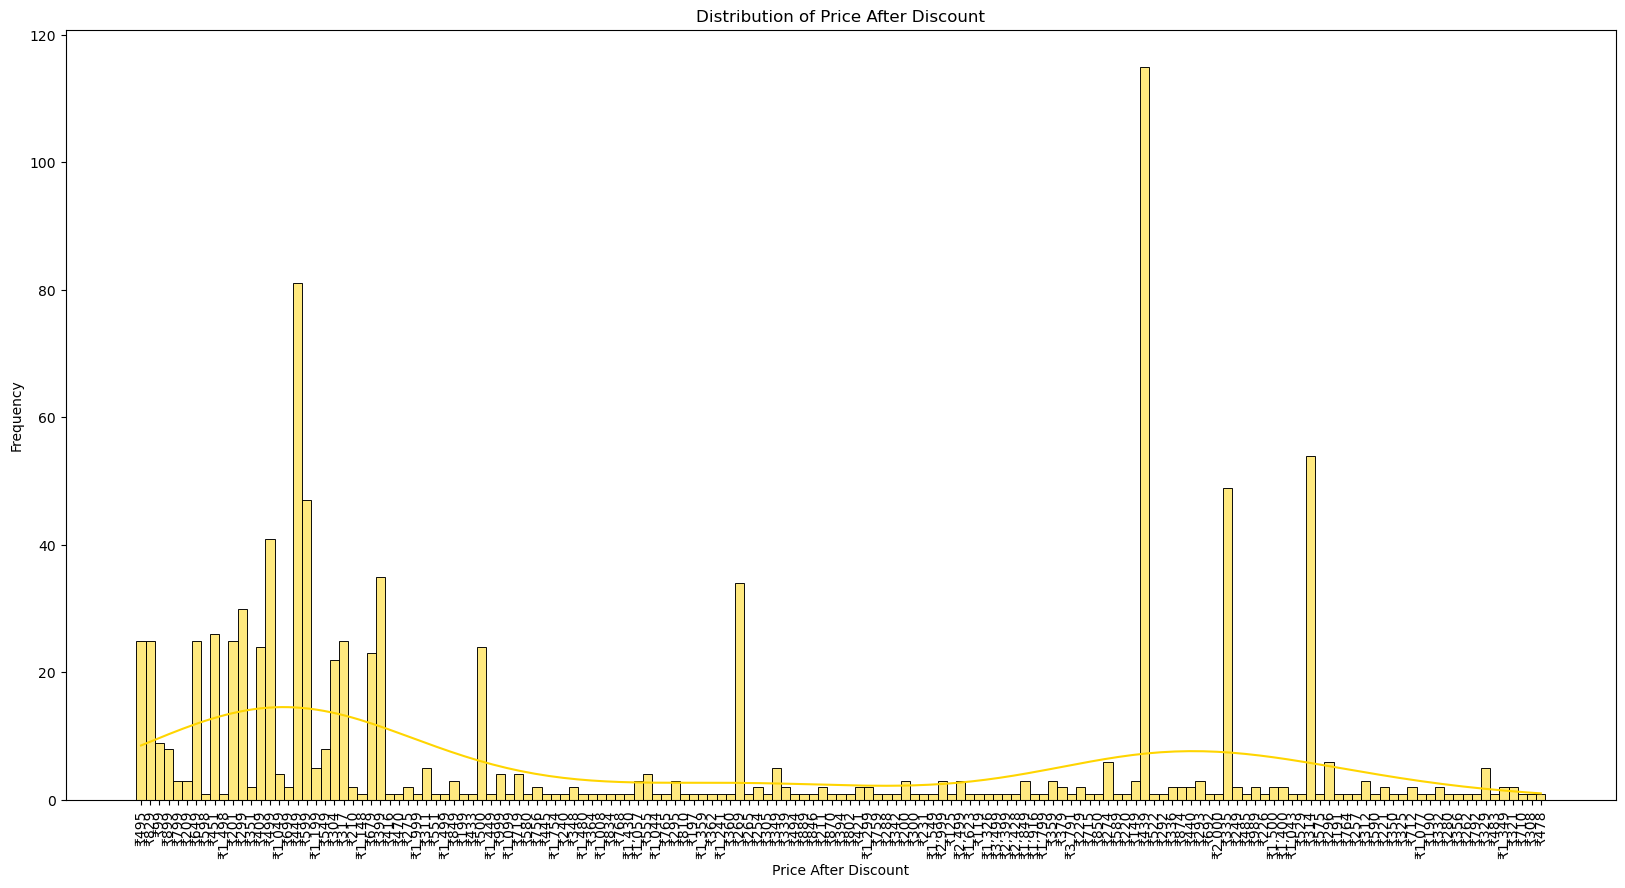

In [72]:
# Color palette
colors = ['#FFD500', '#FFF30A', '#FFF533', '#FFF75C', '#FFFA99', 
          '#04188B', '#0D56D3', '#55A8F1', '#74BEFB', '#A7C3F1']

# Plot distribution plot for 'Price_after_dis'
plt.figure(figsize=(20, 10))
sns.histplot(df['Price_after_dis'], kde=True, color=colors[0])
plt.title('Distribution of Price After Discount')
plt.xlabel('Price After Discount')
plt.ylabel('Frequency')

# Add ticks
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


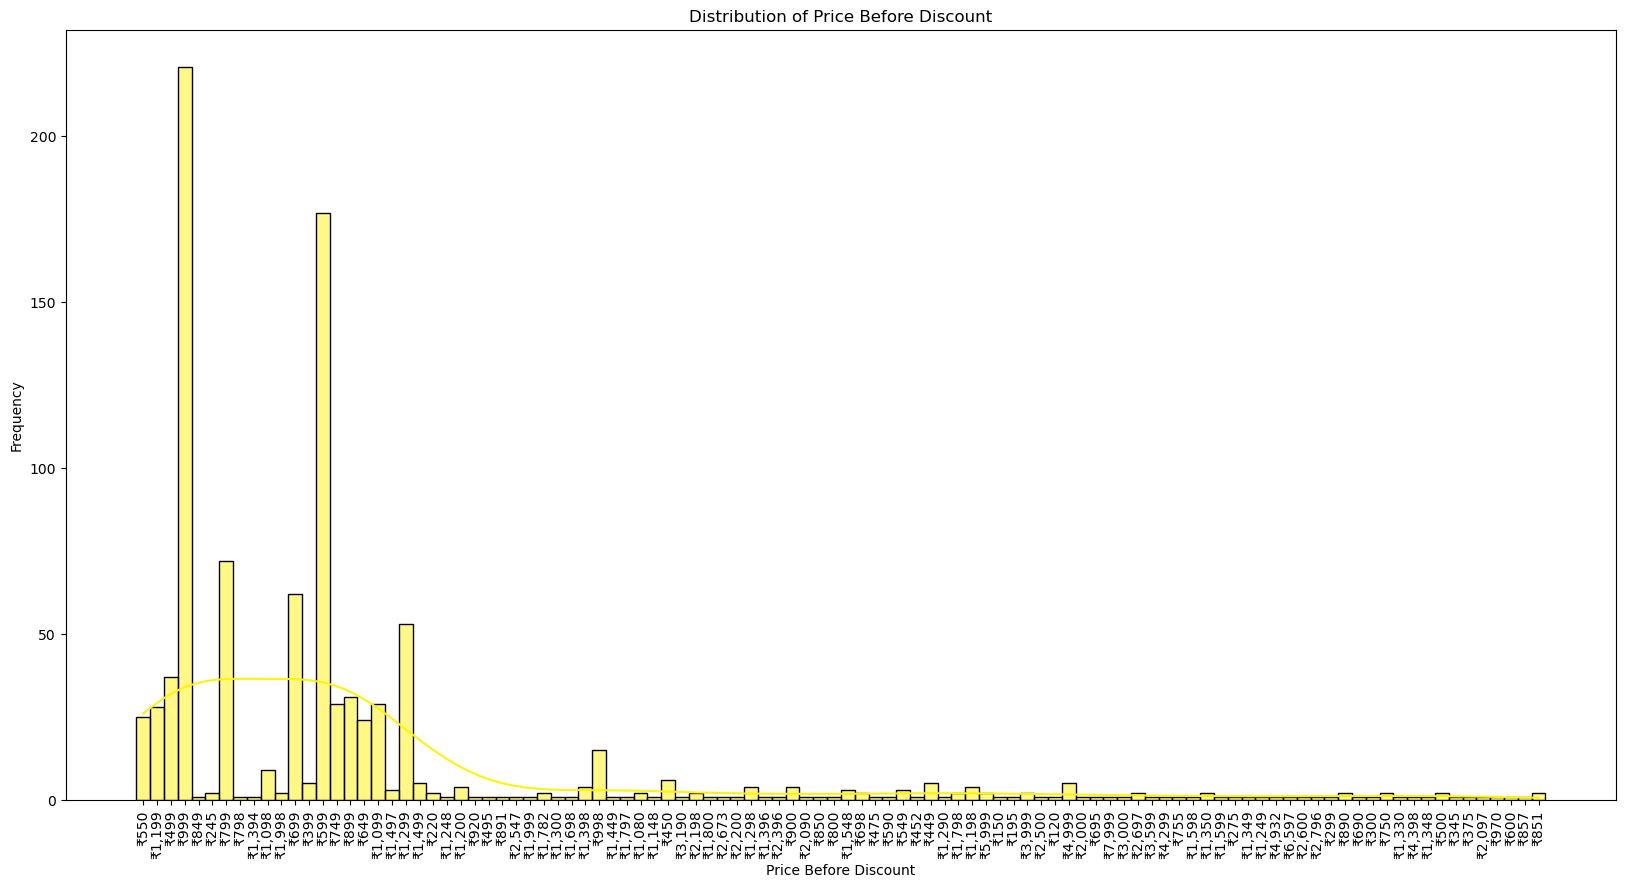

In [73]:
# Color palette
colors = ['#FFD500', '#FFF30A', '#FFF533', '#FFF75C', '#FFFA99', 
          '#04188B', '#0D56D3', '#55A8F1', '#74BEFB', '#A7C3F1']

# Plot distribution plot for 'Actual_Price' (Price before discount)
plt.figure(figsize=(20, 10))
sns.histplot(df['Actual_Price'], kde=True, color=colors[1])  # Using the second color from the palette
plt.title('Distribution of Price Before Discount')
plt.xlabel('Price Before Discount')
plt.ylabel('Frequency')

# Add ticks
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

# Ratings 

Text(0, 0.5, 'Count')

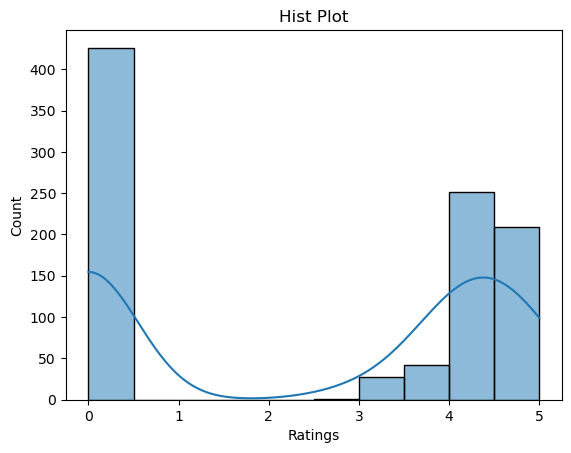

In [74]:
sns.histplot(df2['Ratings'],kde=True,bins=10)
plt.title('Hist Plot')
plt.xlabel('Ratings')
plt.ylabel('Count')

## Which wellness product Brands has the highest customer ratings. (0.5)

In [75]:
# Filter products with a rating of 5.0
highly_rated_products = df2[df2['Ratings'] ==5.0]

# Group by Brand and count the occurrences
ratings_by_brand = highly_rated_products['Brand'].value_counts()


print(f"The wellness product brands with the highest customer ratings are:\n\n{ratings_by_brand}")


The wellness product brands with the highest customer ratings are:

Brand
Nutriburst                 3
Neuherbs                   2
THE BODY RESERVE           2
Nuripure                   2
Nutrina Health lab Golu    2
Simply Herbal              1
healthsetgo                1
ZEROHARM                   1
AITHEN                     1
Online Quality Store       1
Name: count, dtype: int64


In [76]:
pallete1=['#FFD500','#FFF30A','#FFF533','#FFF75C','#FFFA99','#04188B','#0D56D3','#55A8F1','#74BEFB','#A7C3F1']
# Create a ListedColormap using the custom palette
#cmap = ListedColormap(pallete1)

# Bi-variate Analysis

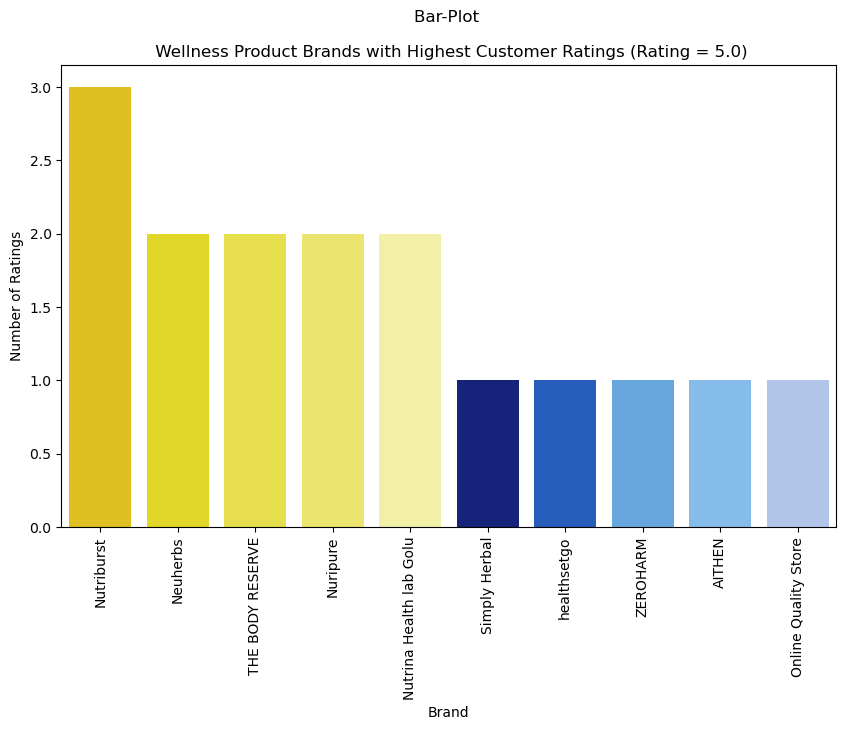

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_by_brand.index, y=ratings_by_brand.values, palette=pallete1)
plt.xticks(rotation=90)
plt.title('Bar-Plot \n\n Wellness Product Brands with Highest Customer Ratings (Rating = 5.0)')
plt.xlabel('Brand')
plt.ylabel('Number of Ratings')
plt.show()

## Products available under 500 to 1000 

In [78]:
# Filter products within the price range of 500 to 1000
filtered_products = df2[(df2['Price_after_dis'] >= 500) & (df2['Price_after_dis'] <= 1000)]

value_counts_result = filtered_products[['Brand','Type']].value_counts()

# Display the value counts
#print(value_counts_result)
# Extract unique brand names
unique_brands = value_counts_result.index.tolist()

# Display the unique brands
print(unique_brands)

[('Nirvasa', 'Multi Vitamin'), ('HEALTHKART', 'Vitamin C'), ('Simply Nutrition', 'Multi Vitamin'), ('La Natures', 'Multi Vitamin'), ("What's Up Wellness", 'Multi Vitamin'), ('Man Matters', 'Multi Vitamin'), ('Centrum', 'Multi Vitamin'), ('THE BODY RESERVE', 'Special Supplements'), ('Be Bodywise', 'Multi Vitamin'), ('INYU', 'Special Supplements'), ('Simply Herbal', 'Special Supplements'), ('Nutrina Health lab Golu', 'Fat Loss'), ('Nutrazee', 'Special Supplements'), ('Nutronova', 'Multi Vitamin'), ('healthsetgo', 'Special Supplements'), ('SHPL', 'Multi Vitamin'), ('VITAWOODS', 'Anti-Oxidants'), ('Simply Herbal', 'Dietary Supplements'), ("What's Up Wellness", 'Special Supplements'), ('ZEROHARM', 'Special Supplements'), ('Zingavita', 'Multi Vitamin'), ('THE BODY RESERVE', 'Multi Vitamin'), ('Zingavita', 'Special Supplements'), ('SwisseMe', 'Special Supplements'), ('grinbizz', 'Special Supplements'), ('mars by GHC', 'Multi Vitamin'), ('Simply Herbal', 'Multi Vitamin'), ('Ace Nutrimony', 'Sp

## Below 500 rupee products 

In [79]:
# Filter products with prices below 500
below_500_products = df2[df2['Price_after_dis'] < 500]

below_500_products_counts = below_500_products[['Brand','Type']].value_counts()
# Extract unique brand names
unique_brands_below_500 = below_500_products_counts.index.tolist()

# Display the unique brands
print(unique_brands_below_500)

[('Vitamatix', 'Dietary Supplements'), ('Bodnut', 'Dietary Supplements'), ('Healthy Streak', 'Dietary Supplements'), ('Healthy Tag', 'Dietary Supplements'), ('Naturewell Organics', 'Dietary Supplements'), ('Neuherbs', 'Multi Vitamin'), ('Centrum', 'Multi Vitamin'), ('Inlife', 'Special Supplements'), ('DNUTRIXN', 'Multi Vitamin'), ('Bione', 'Special Supplements'), ('healthsetgo', 'Special Supplements'), ('Swisse', 'Special Supplements'), ('Nudge', 'Special Supplements'), ('Zingavita', 'Special Supplements'), ('DNUTRIXN', 'Fat Loss'), ('Nature Prime', 'Dietary Supplements'), ('NutraEats', 'Dietary Supplements'), ('Naturewise', 'Multi Vitamin'), ('La Natures', 'Multi Vitamin'), ('Nutrina Health lab Golu', 'Special Supplements'), ('THE BODY RESERVE', 'Special Supplements'), ('Nuripure', 'Special Supplements'), ('Purna Gummies', 'Special Supplements'), ('INYU', 'Special Supplements'), ('Nutriburst', 'Multi Vitamin'), ('Nature Sure', 'Multi Vitamin'), ('Nature Sure', 'Vitamin B12'), ('Top Gu

# Dietary Supplements 

In [80]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products = df2[(df2['Type'].isin(['Dietary Supplements'])) & 
                         (df2['Ratings'] > 4.5)]

# Extract brand, price, and quantity columns
brand_prices_quantity = filtered_products[['Brand', 'Price_after_dis']]

# Display the results
print(brand_prices_quantity)

                 Brand  Price_after_dis
369  Healthy Nutrition            692.0
590       Nature Prime            257.0


In [81]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products1 = df2[(df2['Type'].isin(['Dietary Supplements'])) & 
                         (df2['Ratings'] > 4.5)]
# Extract brand, price, and quantity columns
brand_prices_quantity1 = filtered_products[['Brand', 'Actual_Price']]

# Display the results
print(brand_prices_quantity1)

                 Brand  Actual_Price
369  Healthy Nutrition        1499.0
590       Nature Prime         599.0


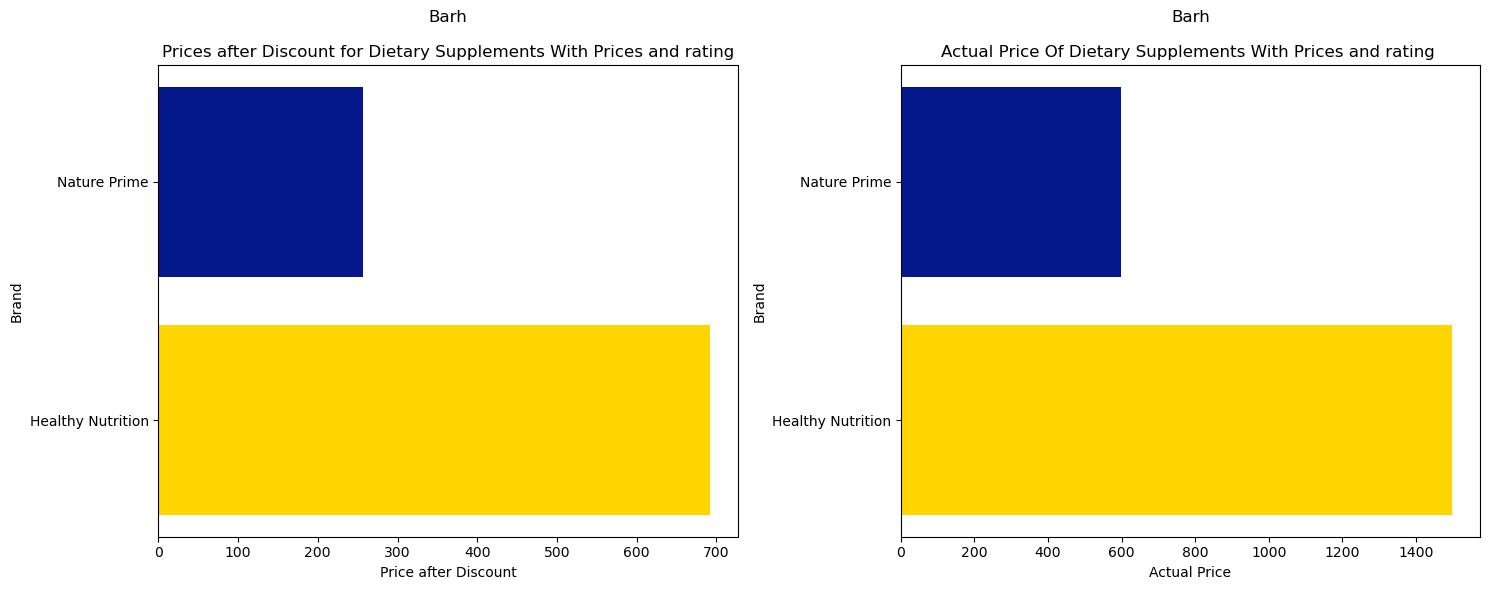

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the first bar graph
axs[0].barh(brand_prices_quantity['Brand'], brand_prices_quantity['Price_after_dis'], color=['#FFD500','#04188B'])

# Adding labels and title for the first subplot
axs[0].set_xlabel('Price after Discount')
axs[0].set_ylabel('Brand')
axs[0].set_title('Barh\n\nPrices after Discount for Dietary Supplements With Prices and rating')

# Plotting the second bar graph
axs[1].barh(brand_prices_quantity1['Brand'], brand_prices_quantity1['Actual_Price'], color=['#FFD500','#04188B'])

# Adding labels and title for the second subplot
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Brand')
axs[1].set_title('Barh\n\nActual Price Of Dietary Supplements With Prices and rating ')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplots
plt.show()

In [83]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products2 = df2[(df2['Type'].isin(['Multi Vitamin'])) & 
                         (df2['Ratings'] > 4.5)]

# Extract brand, price, and quantity columns
brand_prices_quantity2 = filtered_products2.groupby(['Brand'])['Price_after_dis'].median().reset_index()

# Display the results
print(brand_prices_quantity2)

                      Brand  Price_after_dis
0                    AITHEN            499.0
1                   Centrum            495.0
2             Dr. Chewitals            356.0
3          Fuel N Fantastic            149.0
4                NEWTREESUN            292.0
5               Nature Sure            362.0
6           Nature's Bounty           1849.0
7                  Neuherbs            499.0
8                   Nirvasa            649.0
9                Nutriburst            399.0
10  Nutrina Health lab Golu            229.0
11                    Ovlin            299.0
12               Panchamrit            768.0
13         THE BODY RESERVE            393.5
14                     Well            485.0
15       What's Up Wellness            679.0
16              healthsetgo            421.0


In [84]:
filtered_products3 = df2[(df2['Type'].isin(['Multi Vitamin'])) & 
                         (df2['Ratings'] > 4.5)]

# Extract brand, price, and quantity columns
brand_prices_quantity3 = filtered_products3.groupby(['Brand'])['Actual_Price'].median().reset_index()

# Display the results
print(brand_prices_quantity3)

                      Brand  Actual_Price
0                    AITHEN         699.0
1                   Centrum         550.0
2             Dr. Chewitals         375.0
3          Fuel N Fantastic         899.0
4                NEWTREESUN         599.0
5               Nature Sure         850.0
6           Nature's Bounty        3999.0
7                  Neuherbs         749.0
8                   Nirvasa         999.0
9                Nutriburst         449.0
10  Nutrina Health lab Golu         450.0
11                    Ovlin         851.0
12               Panchamrit        1200.0
13         THE BODY RESERVE         898.5
14                     Well         699.0
15       What's Up Wellness         899.0
16              healthsetgo         749.0


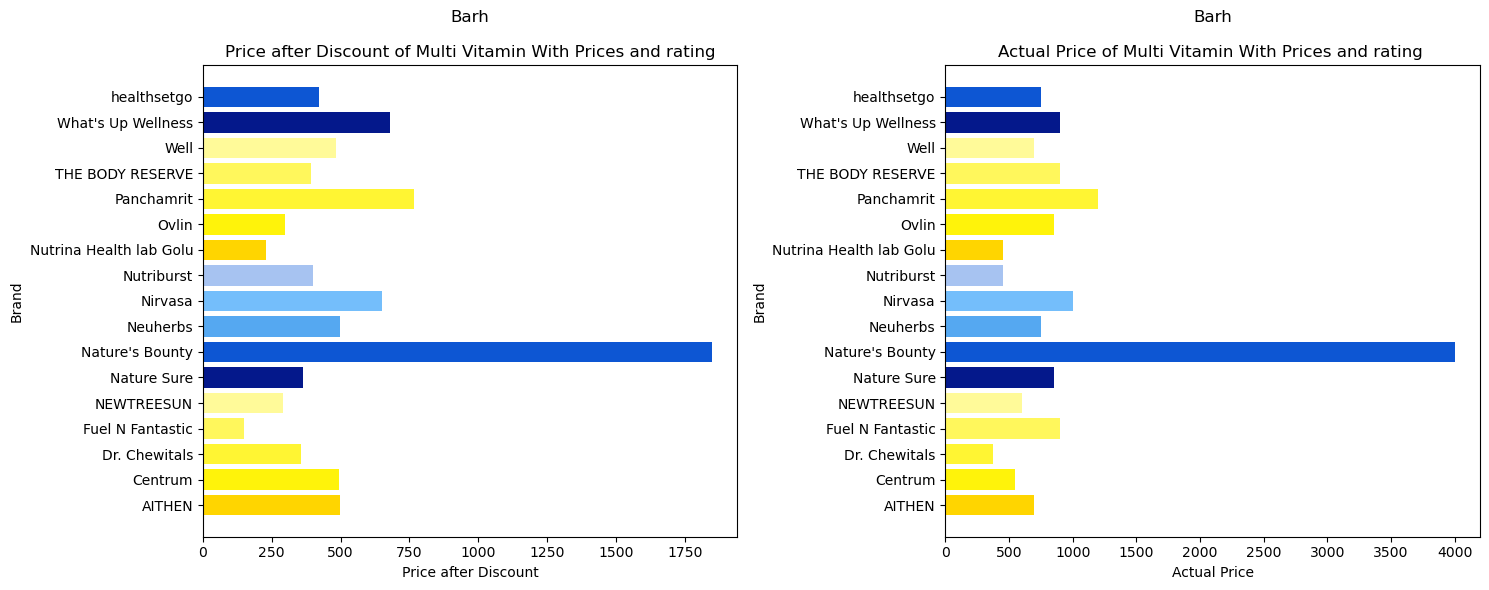

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the first bar graph
axs[0].barh(brand_prices_quantity2['Brand'], brand_prices_quantity2['Price_after_dis'], color=pallete1)

# Adding labels and title for the first subplot
axs[0].set_xlabel('Price after Discount')
axs[0].set_ylabel('Brand')
axs[0].set_title('Barh\n\nPrice after Discount of Multi Vitamin With Prices and rating')

# Plotting the second bar graph
axs[1].barh(brand_prices_quantity3['Brand'], brand_prices_quantity3['Actual_Price'], color=pallete1)

# Adding labels and title for the second subplot
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Brand')
axs[1].set_title('Barh\n\nActual Price of Multi Vitamin With Prices and rating ')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplots
plt.show()

In [86]:
 filtered_products3[filtered_products3['Brand']=='Nature\'s Bounty']

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Price_after_dis,Actual_Price,Ratings,Gluten_Free,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
258,Nature's Bounty,Multi Vitamin,80,Not_Mentioned,Gummies,18.0,1849.0,3999.0,4.8,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products4 = df2[(df2['Type'].isin(['Special Supplements'])) & 
                         (df2['Ratings'] > 4.5)]

# Extract brand, price, and quantity columns
brand_prices_quantity4 = filtered_products4.groupby(['Brand'])['Price_after_dis'].median().reset_index()

# Display the results
print(brand_prices_quantity4)

                      Brand  Price_after_dis
0          Better Nutrition            802.0
1                        CF            499.0
2                   Centrum           2428.0
3                    Evvora            221.0
4                  LeafLean            226.0
5                  Modicare            499.0
6                NEWTREESUN            339.0
7                  Neuherbs            499.0
8                   Nirvasa            449.0
9                     Nudge            409.0
10                 Nuripure            359.0
11                 Nutrazee            580.0
12               Nutriburst            444.0
13  Nutrina Health lab Golu            240.0
14    Royale Health Gummies            299.0
15                     Setu            849.0
16            Simply Herbal            399.0
17         THE BODY RESERVE            425.0
18                 ZEROHARM            849.0


In [88]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products5 = df2[(df2['Type'].isin(['Special Supplements'])) & 
                         (df2['Ratings'] > 4.5)]

# Extract brand, price, and quantity columns
brand_prices_quantity5 = filtered_products5.groupby(['Brand'])['Actual_Price'].median().reset_index()
# Display the results
print(brand_prices_quantity5)

                      Brand  Actual_Price
0          Better Nutrition        1290.0
1                        CF         800.0
2                   Centrum        7999.0
3                    Evvora         499.0
4                  LeafLean         499.0
5                  Modicare         699.0
6                NEWTREESUN         799.0
7                  Neuherbs         749.0
8                   Nirvasa        1099.0
9                     Nudge         499.0
10                 Nuripure         999.0
11                 Nutrazee         799.0
12               Nutriburst         499.0
13  Nutrina Health lab Golu         450.0
14    Royale Health Gummies         699.0
15                     Setu        1200.0
16            Simply Herbal         899.0
17         THE BODY RESERVE        1047.0
18                 ZEROHARM        1249.0


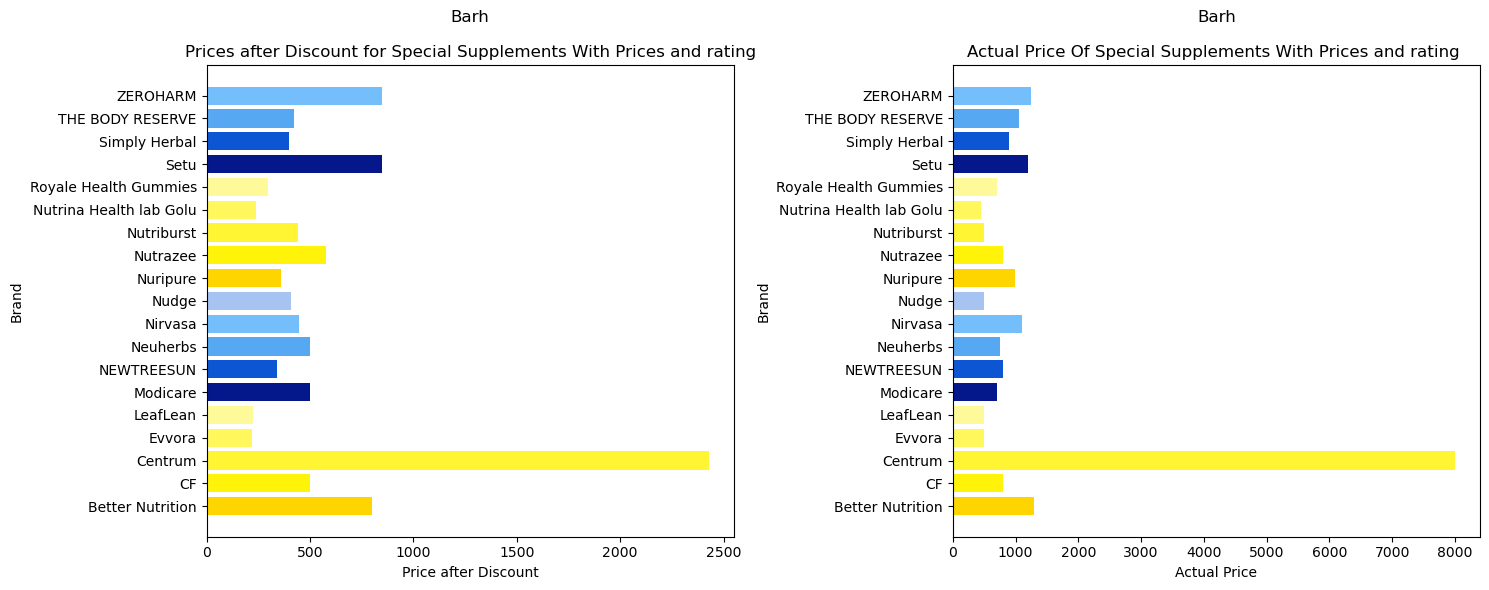

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the first bar graph
axs[0].barh(brand_prices_quantity4['Brand'], brand_prices_quantity4['Price_after_dis'], color=pallete1)

# Adding labels and title for the first subplot
axs[0].set_xlabel('Price after Discount')
axs[0].set_ylabel('Brand')
axs[0].set_title('Barh\n\nPrices after Discount for Special Supplements With Prices and rating')

# Plotting the second bar graph
axs[1].barh(brand_prices_quantity5['Brand'], brand_prices_quantity5['Actual_Price'], color=pallete1)

# Adding labels and title for the second subplot
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Brand')
axs[1].set_title('Barh\n\nActual Price Of Special Supplements With Prices and rating ')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplots
plt.show()

In [90]:
filtered_products5[filtered_products5['Brand']=='Centrum']

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Price_after_dis,Actual_Price,Ratings,Gluten_Free,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
257,Centrum,Special Supplements,100,Not_Mentioned,Gummies,18.0,2428.0,7999.0,4.8,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products6 = df2[(df2['Type'].isin(['Vitamin C'])) & 
                         (df2['Ratings'] > 4.5)]
# Extract brand, price, and quantity columns
brand_prices_quantity6 = filtered_products6.groupby(['Brand'])['Price_after_dis'].median().reset_index()
   
# Display the results
print(brand_prices_quantity6)

     Brand  Price_after_dis
0       CF            499.0
1  wommune            211.0


In [92]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products7 = df2[(df2['Type'].isin(['Vitamin C'])) & 
                         (df2['Ratings'] > 4.5)]
# Extract brand, price, and quantity columns
brand_prices_quantity7 = filtered_products6.groupby(['Brand'])['Actual_Price'].median().reset_index
   
# Display the results
print(brand_prices_quantity7)

<bound method Series.reset_index of Brand
CF         890.0
wommune    452.0
Name: Actual_Price, dtype: float64>


In [93]:
filtered_products7

,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Price_after_dis,Actual_Price,Ratings,Gluten_Free,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
184,wommune,Vitamin C,30,Not_Mentioned,Gummies,24.0,211.0,452.0,4.9,0,...,0,0,0,0,0,0,0,0,0,0
560,CF,Vitamin C,60,"Non-GMO, Gluten Free",Gummies,18.0,499.0,890.0,4.8,1,...,0,0,0,0,0,0,0,0,0,0
730,CF,Vitamin C,60,"Non-GMO, Gluten Free",Gummies,18.0,499.0,890.0,4.8,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products8 = df2[(df2['Type'].isin(['Fat Loss'])) & 
                         (df2['Ratings'] > 4.5)]
# Extract brand, price, and quantity columns
brand_prices_quantity8 = filtered_products8.groupby(['Brand'])['Price_after_dis'].median().reset_index()
   
# Display the results
print(brand_prices_quantity8)

                     Brand  Price_after_dis
0              HEALTHOXIDE            599.0
1  Nutrina Health lab Golu            721.5
2                   OUTSUP            604.0


In [95]:
# Filter products in specified categories and with ratings above 4.5 and Quantity of 30 No or 60 No
filtered_products9 = df2[(df2['Type'].isin(['Fat Loss'])) & 
                         (df2['Ratings'] > 4.5)]
# Extract brand, price, and quantity columns
brand_prices_quantity9 = filtered_products9.groupby(['Brand'])['Actual_Price'].median().reset_index()
   
# Display the results
print(brand_prices_quantity9)

                     Brand  Actual_Price
0              HEALTHOXIDE         857.0
1  Nutrina Health lab Golu        1125.0
2                   OUTSUP        1648.5


In [96]:
filtered_products9


,Brand,Type,Quantity,Diet_preferences,Form,Maximum_Shelf_Life(In_Months),Price_after_dis,Actual_Price,Ratings,Gluten_Free,...,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
204,OUTSUP,Fat Loss,60,Not_Mentioned,Gummies,16.0,759.0,2198.0,4.8,0,...,0,0,0,0,0,0,0,0,0,0
550,Nutrina Health lab Golu,Fat Loss,90,"Dairy Free, Gluten Free, No Artificial Color, ...",Gummies,18.0,764.0,1350.0,5.0,1,...,1,1,1,1,0,1,0,0,0,0
597,OUTSUP,Fat Loss,500,"Dairy Free, Gluten Free, No Artificial Flavor,...",Gummies,18.0,449.0,1099.0,4.8,1,...,1,1,0,0,0,0,0,0,0,0
716,Nutrina Health lab Golu,Fat Loss,60,"Dairy Free, Gluten Free, No Artificial Color, ...",Gummies,18.0,679.0,900.0,5.0,1,...,1,1,1,1,0,1,0,0,0,0
851,HEALTHOXIDE,Fat Loss,60,Dairy Free,Gummies,18.0,599.0,857.0,4.8,0,...,0,0,0,0,0,0,0,0,0,0


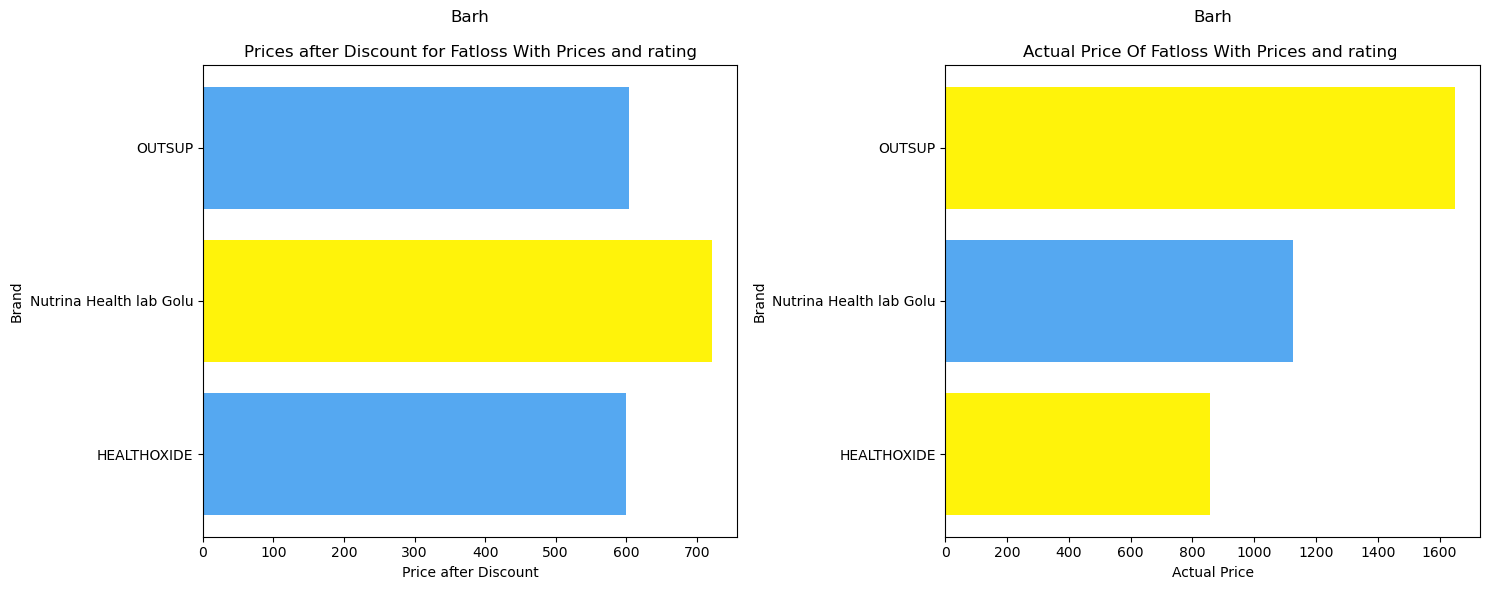

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the first bar graph
axs[0].barh(brand_prices_quantity8['Brand'], brand_prices_quantity8['Price_after_dis'], color=['#55A8F1','#FFF30A'])

# Adding labels and title for the first subplot
axs[0].set_xlabel('Price after Discount')
axs[0].set_ylabel('Brand')
axs[0].set_title('Barh\n\nPrices after Discount for Fatloss With Prices and rating')

# Plotting the second bar graph
axs[1].barh(brand_prices_quantity9['Brand'], brand_prices_quantity9['Actual_Price'], color=['#FFF30A','#55A8F1'])

# Adding labels and title for the second subplot
axs[1].set_xlabel('Actual Price')
axs[1].set_ylabel('Brand')
axs[1].set_title('Barh\n\nActual Price Of Fatloss With Prices and rating ')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplots
plt.show()

In [98]:
df2.columns

Index(['Brand', 'Type', 'Quantity', 'Diet_preferences', 'Form',
       'Maximum_Shelf_Life(In_Months)', 'Price_after_dis', 'Actual_Price',
       'Ratings', 'Gluten_Free', 'Sugar_Free', 'Dairy_Free', 'Non_GMO',
       'No_Soy', 'No_Dairy', 'Wheat_Free', 'No_Corn', 'Yeast_Free',
       'No_Artificial_Color', 'No_Artificial_Flavor', 'No_MSG', 'No_Trans_Fat',
       'No_Starch', 'No_Cholesterol', 'Low_Cholesterol', 'Sodium_Free',
       'No_Sodium', 'Low_Sodium'],
      dtype='object')

In [99]:
df2[df2['Type'].isin(['Multi Vitamin'])].groupby('Type')[['No_Artificial_Color','No_Artificial_Flavor','No_MSG','No_Trans_Fat','No_Starch']].sum()


,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch
Type,,,,,
Multi Vitamin,53,27,33,20,4


In [100]:
df2[df2['Type'].isin(['Special Supplements'])].groupby('Type')[['No_Artificial_Color','No_Artificial_Flavor','No_MSG','No_Trans_Fat','No_Starch']].sum()


,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch
Type,,,,,
Special Supplements,77,54,8,19,7


In [101]:
result = df2.groupby('Brand').agg({'Actual_Price': 'mean', 'Ratings': 'mean'})

In [102]:
result

,Actual_Price,Ratings
Brand,,
AITHEN,699.000000,5.00
Ace Nutrimony,660.000000,3.90
BIOQUENCH,899.000000,0.00
Be Bodywise,1398.100000,4.20
Better Nutrition,1290.000000,4.70
...,...,...
power gummies,1250.000000,4.25
saturn by ghc,599.000000,4.10
vitagoli,1499.000000,0.00


In [103]:
result1 = df2.groupby('Brand').agg({'Price_after_dis': 'mean', 'Ratings': 'mean'})
result1

,Price_after_dis,Ratings
Brand,,
AITHEN,499.0,5.00
Ace Nutrimony,419.0,3.90
BIOQUENCH,332.0,0.00
Be Bodywise,1063.9,4.20
Better Nutrition,802.0,4.70
...,...,...
power gummies,424.5,4.25
saturn by ghc,499.0,4.10
vitagoli,1349.0,0.00


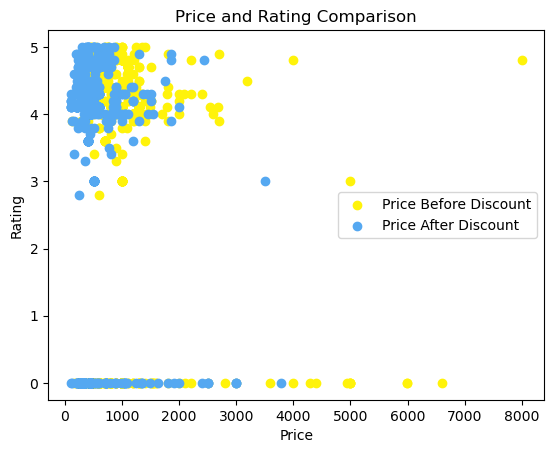

In [104]:
# Plotting the scatter plot
plt.scatter(df2["Actual_Price"], df2['Ratings'], label='Price Before Discount', marker='o', color='#FFF30A')
plt.scatter(df2["Price_after_dis"], df2['Ratings'], label='Price After Discount', marker='o', color='#55A8F1')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price and Rating Comparison')
plt.legend()

In [105]:
max_shelf = df2.groupby('Brand').agg({'Ratings': 'mean','Maximum_Shelf_Life(In_Months)': 'max'})
max_shelf

,Ratings,Maximum_Shelf_Life(In_Months)
Brand,,
AITHEN,5.00,18.0
Ace Nutrimony,3.90,18.0
BIOQUENCH,0.00,18.0
Be Bodywise,4.20,18.0
Better Nutrition,4.70,18.0
...,...,...
power gummies,4.25,18.0
saturn by ghc,4.10,18.0
vitagoli,0.00,18.0


# aithen brand providing good rating as well as maximum 18 shelf life 

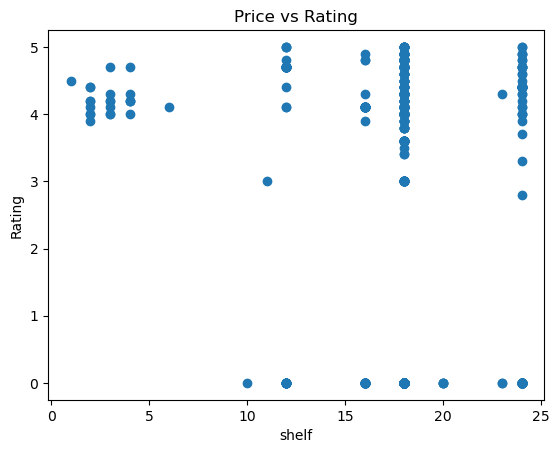

In [106]:
# Plotting the line plot
plt.scatter(df2['Maximum_Shelf_Life(In_Months)'], df2['Ratings'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('shelf')
plt.ylabel('Rating')
plt.title('Price vs Rating')

# Show the plot
plt.show()

# Multi - variate Analysis

In [107]:
correlation_by_brand = df2.groupby('Brand')[['Ratings', 'Actual_Price', 'Price_after_dis']].corr().unstack()['Ratings']
correlation_by_brand

,Ratings,Actual_Price,Price_after_dis
Brand,,,
AITHEN,NaN,NaN,NaN
Ace Nutrimony,NaN,NaN,NaN
BIOQUENCH,NaN,NaN,NaN
Be Bodywise,1.0,0.597225,0.451672
Better Nutrition,NaN,NaN,NaN
...,...,...,...
power gummies,1.0,1.000000,1.000000
saturn by ghc,NaN,NaN,NaN
vitagoli,NaN,NaN,NaN


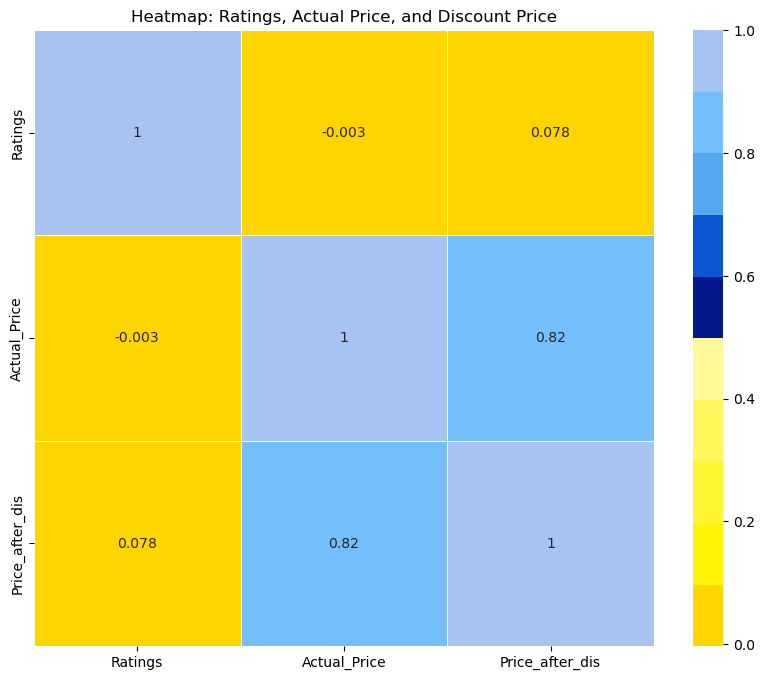

In [108]:
# Assuming df contains your dataset with 'Ratings', 'Actual_Price', and 'Discount_Price' columns
# Calculate the correlation matrix
correlation_matrix = df2[['Ratings', 'Actual_Price', 'Price_after_dis']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=['#FFD500','#FFF30A','#FFF533','#FFF75C','#FFFA99','#04188B','#0D56D3','#55A8F1','#74BEFB','#A7C3F1'], linewidths=0.5)

plt.title('Heatmap: Ratings, Actual Price, and Discount Price')
plt.show()

In [109]:
Artificial_Ingredients = df2[['Type','Ratings','No_Artificial_Color', 'No_Artificial_Flavor', 'No_MSG', 'No_Trans_Fat',
       'No_Starch']]

### No Artificial Ingrediants 

In [110]:
xx = df2.groupby(['Type'])[['No_Artificial_Color', 'No_Artificial_Flavor', 'No_MSG', 'No_Trans_Fat',
       'No_Starch']].sum()
xx

,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch
Type,,,,,
Anti-Oxidants,0,0,0,1,0
Ayurvedic,0,0,0,0,0
Dietary Supplements,0,0,0,0,0
Fat Loss,5,4,2,4,1
Multi Vitamin,53,27,33,20,4
Omega Fatty Acids,3,1,0,0,0
Special Supplements,77,54,8,19,7
Vitamin B,0,0,0,0,0
Vitamin B12,0,0,0,0,0


In [111]:
xx = df2.groupby(['Type'])[['Ratings','No_Artificial_Color', 'No_Artificial_Flavor', 'No_MSG', 'No_Trans_Fat', 'No_Starch']].sum()
xx

,Ratings,No_Artificial_Color,No_Artificial_Flavor,No_MSG,No_Trans_Fat,No_Starch
Type,,,,,,
Anti-Oxidants,8.3,0,0,0,1,0
Ayurvedic,18.4,0,0,0,0,0
Dietary Supplements,50.1,0,0,0,0,0
Fat Loss,135.5,5,4,2,4,1
Multi Vitamin,1161.9,53,27,33,20,4
Omega Fatty Acids,0.0,3,1,0,0,0
Special Supplements,741.8,77,54,8,19,7
Vitamin B,4.0,0,0,0,0,0
Vitamin B12,12.5,0,0,0,0,0


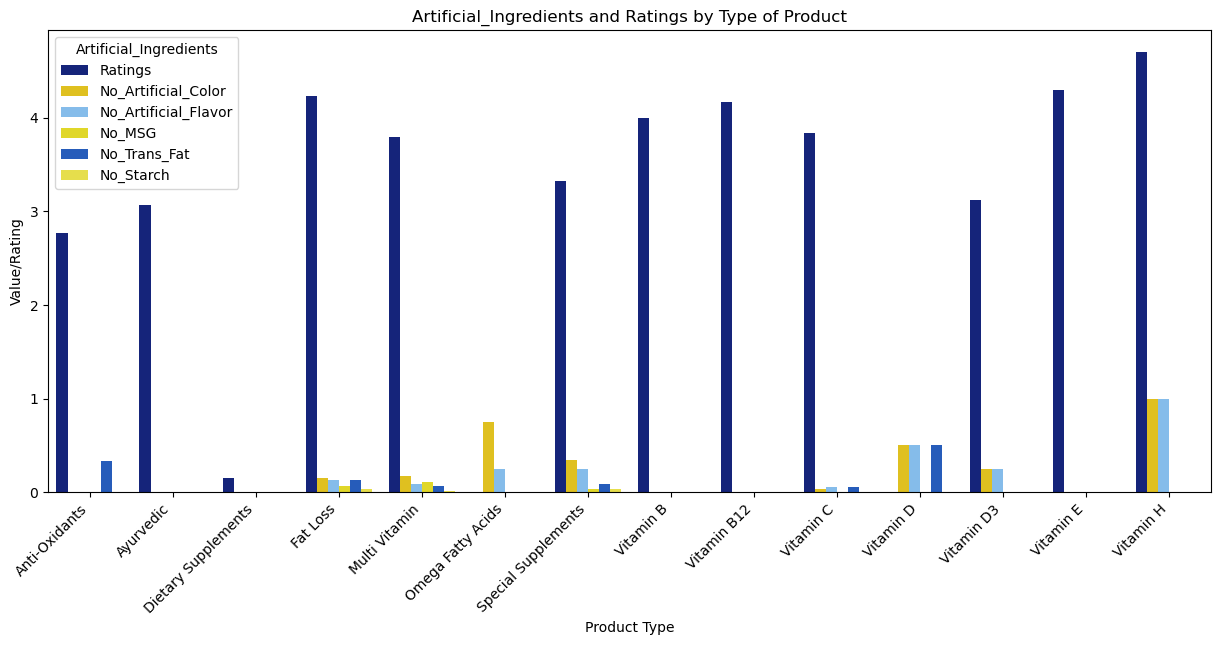

In [112]:
# Convert 'Ratings' column to numeric, coercing errors to NaN
df2['Ratings'] = pd.to_numeric(df2['Ratings'], errors='coerce')

# Assuming 'Ratings' is the column representing product ratings
xx = df2.groupby(['Type'])[['Ratings','No_Artificial_Color', 'No_Artificial_Flavor', 'No_MSG', 'No_Trans_Fat',
       'No_Starch']].mean()

# Resetting index to make 'Type' a column for plotting
xx = xx.reset_index()

# Melt the DataFrame to make it suitable for a grouped bar chart
xx_melted = xx.melt(id_vars='Type', var_name='Attribute', value_name='Value')

# Plotting a grouped bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='Type', y='Value', hue='Attribute', data=xx_melted, palette=['#04188B','#FFD500','#74BEFB', '#FFF30A',   '#0D56D3', '#FFF533', '#FFF75C'])
plt.title('Artificial_Ingredients and Ratings by Type of Product')
plt.ylabel('Value/Rating')
plt.xlabel('Product Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better x-axis visibility
plt.legend(title='Artificial_Ingredients', loc='upper left')
plt.show()


### In multivitamin and special supplements has maximum features 

In [113]:
Dieteray_restrictions = df2.groupby(['Type'])[['Ratings','Gluten_Free', 'Sugar_Free', 'Dairy_Free', 'Non_GMO',
       'No_Soy', 'No_Dairy', 'Wheat_Free', 'No_Corn', 'Yeast_Free']].sum()
Dieteray_restrictions

,Ratings,Gluten_Free,Sugar_Free,Dairy_Free,Non_GMO,No_Soy,No_Dairy,Wheat_Free,No_Corn,Yeast_Free
Type,,,,,,,,,,
Anti-Oxidants,8.3,2,0,1,0,2,0,1,0,0
Ayurvedic,18.4,0,1,0,0,0,0,0,0,0
Dietary Supplements,50.1,0,2,0,0,0,0,0,0,0
Fat Loss,135.5,6,1,5,3,3,3,3,0,0
Multi Vitamin,1161.9,91,46,34,48,19,7,6,10,7
Omega Fatty Acids,0.0,3,1,3,3,2,2,0,0,0
Special Supplements,741.8,108,57,69,71,44,41,42,12,13
Vitamin B,4.0,0,0,0,0,0,0,0,0,0
Vitamin B12,12.5,1,0,0,0,0,0,0,0,0


# Dietary Ingrediants

In [114]:
a = Dieteray_restrictions.groupby(['Type'])[['Ratings','Gluten_Free', 'Sugar_Free', 'Dairy_Free', 'Non_GMO',
       'No_Soy', 'No_Dairy', 'Wheat_Free', 'No_Corn', 'Yeast_Free']].sum()
a

,Ratings,Gluten_Free,Sugar_Free,Dairy_Free,Non_GMO,No_Soy,No_Dairy,Wheat_Free,No_Corn,Yeast_Free
Type,,,,,,,,,,
Anti-Oxidants,8.3,2,0,1,0,2,0,1,0,0
Ayurvedic,18.4,0,1,0,0,0,0,0,0,0
Dietary Supplements,50.1,0,2,0,0,0,0,0,0,0
Fat Loss,135.5,6,1,5,3,3,3,3,0,0
Multi Vitamin,1161.9,91,46,34,48,19,7,6,10,7
Omega Fatty Acids,0.0,3,1,3,3,2,2,0,0,0
Special Supplements,741.8,108,57,69,71,44,41,42,12,13
Vitamin B,4.0,0,0,0,0,0,0,0,0,0
Vitamin B12,12.5,1,0,0,0,0,0,0,0,0


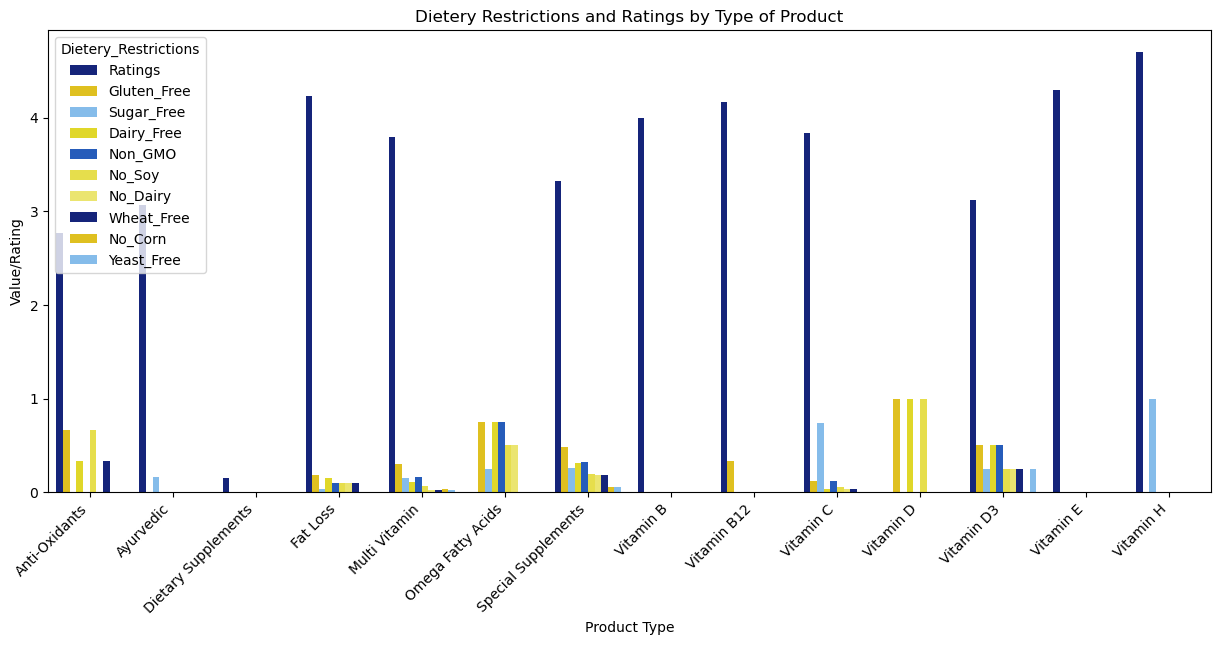

In [115]:
# Convert 'Ratings' column to numeric, coercing errors to NaN
df2['Ratings'] = pd.to_numeric(df2['Ratings'], errors='coerce')

# Assuming 'Ratings' is the column representing product ratings
xx = df2.groupby(['Type'])[['Ratings','Gluten_Free', 'Sugar_Free', 'Dairy_Free', 'Non_GMO',
       'No_Soy', 'No_Dairy', 'Wheat_Free', 'No_Corn', 'Yeast_Free']].mean()

# Resetting index to make 'Type' a column for plotting
xx = xx.reset_index()

# Melt the DataFrame to make it suitable for a grouped bar chart
xx_melted = xx.melt(id_vars='Type', var_name='Attribute', value_name='Value')

# Plotting a grouped bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='Type', y='Value', hue='Attribute', data=xx_melted, palette=['#04188B','#FFD500','#74BEFB', '#FFF30A',   '#0D56D3', '#FFF533', '#FFF75C'])
plt.title('Dietery Restrictions and Ratings by Type of Product')
plt.ylabel('Value/Rating')
plt.xlabel('Product Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better x-axis visibility
plt.legend(title='Dietery_Restrictions', loc='upper left')
plt.show()


### Here also multivitamin Special supplements providing more feautures 

In [116]:
Cholestrol_Sodium = df2.groupby(['Type'])[['Ratings','No_Cholesterol', 'Low_Cholesterol', 'Sodium_Free',
       'No_Sodium', 'Low_Sodium']].sum()
Cholestrol_Sodium

,Ratings,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
Type,,,,,,
Anti-Oxidants,8.3,1,0,0,0,0
Ayurvedic,18.4,0,0,0,0,0
Dietary Supplements,50.1,0,1,0,0,0
Fat Loss,135.5,4,0,0,0,0
Multi Vitamin,1161.9,3,1,1,0,0
Omega Fatty Acids,0.0,0,0,0,0,0
Special Supplements,741.8,35,1,7,5,1
Vitamin B,4.0,0,0,0,0,0
Vitamin B12,12.5,0,0,0,0,0


### No sodium ingrediants 

In [117]:
xx = df2.groupby(['Type'])[['No_Cholesterol', 'Low_Cholesterol', 'Sodium_Free',
       'No_Sodium', 'Low_Sodium']].sum()
xx

,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
Type,,,,,
Anti-Oxidants,1,0,0,0,0
Ayurvedic,0,0,0,0,0
Dietary Supplements,0,1,0,0,0
Fat Loss,4,0,0,0,0
Multi Vitamin,3,1,1,0,0
Omega Fatty Acids,0,0,0,0,0
Special Supplements,35,1,7,5,1
Vitamin B,0,0,0,0,0
Vitamin B12,0,0,0,0,0


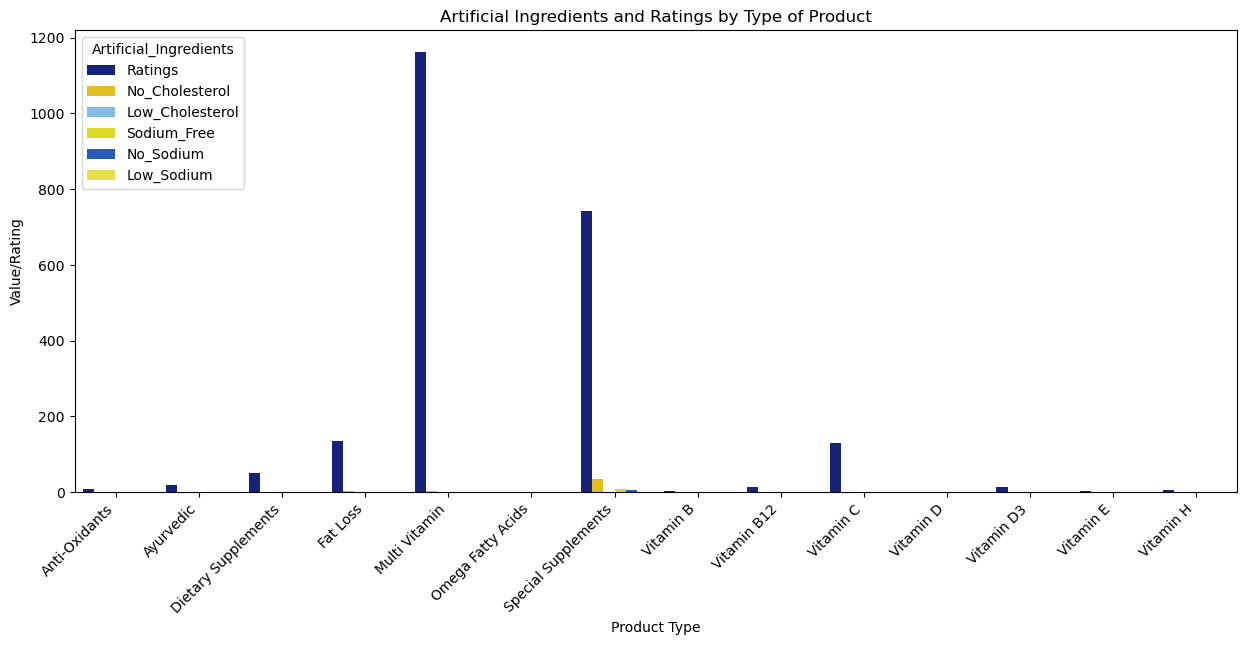

In [118]:
# Convert 'Ratings' column to numeric, coercing errors to NaN
df2['Ratings'] = pd.to_numeric(df2['Ratings'], errors='coerce')

# Assuming 'Ratings' is the column representing product ratings
xx = df2.groupby(['Type'])[['Ratings','No_Cholesterol', 'Low_Cholesterol', 'Sodium_Free',
       'No_Sodium', 'Low_Sodium']].sum()

# Resetting index to make 'Type' a column for plotting
xx = xx.reset_index()

# Melt the DataFrame to make it suitable for a grouped bar chart
xx_melted = xx.melt(id_vars='Type', var_name='Attribute', value_name='Value')

# Plotting a grouped bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='Type', y='Value', hue='Attribute', data=xx_melted, palette=['#04188B','#FFD500','#74BEFB', '#FFF30A',   '#0D56D3', '#FFF533', '#FFF75C'])
plt.title('Artificial Ingredients and Ratings by Type of Product')
plt.ylabel('Value/Rating')
plt.xlabel('Product Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better x-axis visibility
plt.legend(title='Artificial_Ingredients', loc='upper left')
plt.show()


### here multivitamin giving high rating but ,special supplements giving feautures and good rating 

In [119]:
df2.groupby('Type')['Actual_Price'].mean()

Type
Anti-Oxidants           799.000000
Ayurvedic               748.833333
Dietary Supplements     822.537092
Fat Loss               1193.031250
Multi Vitamin          1085.647059
Omega Fatty Acids      2036.750000
Special Supplements     895.112108
Vitamin B              1449.000000
Vitamin B12             682.666667
Vitamin C              1124.470588
Vitamin D              1772.500000
Vitamin D3              642.250000
Vitamin E               799.000000
Vitamin H              1299.000000
Name: Actual_Price, dtype: float64

In [120]:
df2.groupby('Type')['Price_after_dis'].mean()

Type
Anti-Oxidants           402.666667
Ayurvedic               365.500000
Dietary Supplements     383.706231
Fat Loss                355.000000
Multi Vitamin           651.761438
Omega Fatty Acids      1449.000000
Special Supplements     450.766816
Vitamin B              1049.000000
Vitamin B12             381.333333
Vitamin C               740.882353
Vitamin D               732.000000
Vitamin D3              366.000000
Vitamin E               336.000000
Vitamin H               551.000000
Name: Price_after_dis, dtype: float64

In [121]:
# Assuming 'xx' is your DataFrame with the mean values
styled_xx = xx.style.background_gradient(cmap='viridis', axis=None, subset=None)

# Display the styled DataFrame
styled_xx

,Type,Ratings,No_Cholesterol,Low_Cholesterol,Sodium_Free,No_Sodium,Low_Sodium
0,Anti-Oxidants,8.300000,1,0,0,0,0
1,Ayurvedic,18.400000,0,0,0,0,0
2,Dietary Supplements,50.100000,0,1,0,0,0
3,Fat Loss,135.500000,4,0,0,0,0
4,Multi Vitamin,1161.900000,3,1,1,0,0
5,Omega Fatty Acids,0.000000,0,0,0,0,0
6,Special Supplements,741.800000,35,1,7,5,1
7,Vitamin B,4.000000,0,0,0,0,0
8,Vitamin B12,12.500000,0,0,0,0,0
9,Vitamin C,130.500000,1,0,1,1,0


In [123]:
#df2.to_csv('Cleaned_Data.csv')